### Problem Statement

- Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be.


- But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost.



- Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Code to display rows and column borders

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

### Code to display all the columns in the dataset

In [3]:
pd.set_option('display.max_columns', None)

### Code to display all the rows in the dataset

In [4]:
pd.set_option('display.max_rows', None)

### Code to hide warnings

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [6]:
df = pd.read_excel("Data_Train.xlsx")

In [7]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


### Column Description

- TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.


- RESTAURANT_ID: A unique ID for each restaurant.


- CUISINES: The variety of cuisines that the restaurant offers.


- TIME: The open hours of the restaurant.


- CITY: The city in which the restaurant is located.


- LOCALITY: The locality of the restaurant.


- RATING: The average rating of the restaurant by customers.


- VOTES: The overall votes received by the restaurant.


- COST: The average cost of a two-person meal.

### Column Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


### Data Overview:

- A total of 12690 entries in the data set


- 8 column names


- Data types include Int and Objects


- Some null values in the data set

### Problem Type

- The goal is to create an ML model to predict the average cost for a two person meal.


- The management will then use this model to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.


-  Target Variable is COST. The target variable is continuous in nature.


-  Solving it as a Regression problem.

### Lets check for duplicate values

In [9]:
df.duplicated().sum()

25

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

### Lets check for missing values

In [12]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [13]:
# A lot of missing values in the dataset

In [14]:
# check number and percentage of missing values in each column

# Creating a function name missing values table
def missing_values_table(data):
        
        # Total missing values
        mis_val = data.isnull().sum() 
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data) 
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) 
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}) 
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
missing_values_table(df)

Your selected dataframe has 9 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
VOTES,1200,9.5
CITY,112,0.9
LOCALITY,98,0.8
RATING,2,0.0


In [16]:
# VOTES, CITY, LOCALITY, RATING have missing values

### Importing Test Data Set

In [17]:
df_test = pd.read_excel("Data_Test.xlsx")

In [18]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [19]:
df_test.duplicated().sum()

1

In [20]:
df_test.drop_duplicates(inplace=True)

In [21]:
# Checking null values in test data set
missing_values_table(df_test)

Your selected dataframe has 8 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
VOTES,402,9.5
CITY,35,0.8
LOCALITY,30,0.7
RATING,2,0.0


In [22]:
# VOTES, CITY, LOCALITY, RATING have missing values in test dataset

## Data Cleaning

#### Combining train and test data

In [23]:
df_combine = pd.concat([df,df_test])

In [24]:
df_combine.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [25]:
df_combine.shape

(16895, 9)

In [26]:
df_combine.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
dtype: int64

In [27]:
df_test.shape

(4230, 8)

In [28]:
df_combine.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [29]:
# handling Null values

In [30]:
# Checking null values in TITLE column
df_combine["TITLE"].isnull().sum()

0

In [31]:
# Checking 
df_combine["TITLE"].nunique()

123

In [32]:
df_combine["TITLE"].value_counts()

QUICK BITES                     5627
CASUAL DINING                   4902
None                            1284
CAFÉ                             829
DESSERT PARLOR                   507
CASUAL DINING,BAR                463
FINE DINING                      406
BAKERY                           391
BEVERAGE SHOP                    215
BAR,CASUAL DINING                175
LOUNGE                           135
BAKERY,QUICK BITES               126
BAR                              124
FOOD COURT                       110
KIOSK                             73
SWEET SHOP,QUICK BITES            70
MESS                              68
PUB                               67
SWEET SHOP                        67
CASUAL DINING,CAFÉ                65
DHABA                             61
BAKERY,DESSERT PARLOR             61
DESSERT PARLOR,QUICK BITES        57
QUICK BITES,SWEET SHOP            49
CAFÉ,CASUAL DINING                47
BEVERAGE SHOP,QUICK BITES         44
CAFÉ,BAKERY                       43
P

In [33]:
df_combine["CUISINES"].nunique()

5183

In [34]:
# we can drop the Restaurant ID column

In [35]:
df_combine = df_combine.drop("RESTAURANT_ID",axis=1)

In [36]:
df_combine.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [37]:
df_combine["TITLE"] = df_combine["TITLE"].str.split(",").str[0]

In [38]:
df_combine["TITLE"].nunique()

25

In [39]:
df_combine["TITLE"].isnull().sum()

0

In [40]:
df_combine.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [41]:
df_combine["CUISINES"] = df_combine["CUISINES"].str.split(",").str[0]

In [42]:
df_combine.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,Asian,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,North Indian,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,Tibetan,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [43]:
df_combine["CUISINES"].nunique()

106

In [44]:
df_combine = df_combine.drop("TIME",axis=1)

In [45]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165 votes,300.0


In [46]:
df_combine["CITY"].isnull().sum()

147

In [47]:
df_combine["CITY"].mode()

0    Chennai
dtype: object

In [48]:
df_combine["CITY"] = df_combine["CITY"].fillna("Chennai") 

In [49]:
df_combine["CITY"].isnull().sum()

0

In [50]:
df_combine["LOCALITY"].isnull().sum()

128

In [51]:
df_combine["LOCALITY"].mode()

0    Gachibowli
dtype: object

In [52]:
df_combine["LOCALITY"] = df_combine["LOCALITY"].fillna("Gachibowli") 

In [53]:
df_combine["LOCALITY"].isnull().sum()

0

In [54]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165 votes,300.0


In [55]:
df_combine["RATING"].dtype

dtype('O')

In [56]:
df_combine["RATING"].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [57]:
df_combine["RATING"] = df_combine["RATING"].replace({"NEW":3.5})

In [58]:
df_combine["RATING"].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 3.5, '3.1', '2.5', '4.6',
       '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [59]:
df_combine["RATING"].isnull().sum()

4

In [60]:
df_combine["RATING"] = df_combine["RATING"].replace({"-":3.5})

In [61]:
df_combine["RATING"] = df_combine["RATING"].astype(float)

In [62]:
df_combine["RATING"].unique()

array([3.6, 4.2, 3.8, 4.1, 4. , 4.3, 3.9, 3.3, 3.4, 3.5, 4.5, 4.4, 2.7,
       3.7, 4.7, 3.1, 2.5, 4.6, 2.8, nan, 3. , 3.2, 2.6, 2.9, 4.9, 4.8,
       2.4, 2.3, 2. , 2.1, 2.2])

In [63]:
df_combine["RATING"].describe()

count    16891.000000
mean         3.757397
std          0.412948
min          2.000000
25%          3.500000
50%          3.800000
75%          4.000000
max          4.900000
Name: RATING, dtype: float64

In [64]:
df_combine["RATING"] = df_combine["RATING"].fillna(3.5)

In [65]:
df_combine["RATING"].isnull().sum()

0

In [66]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165 votes,300.0


In [67]:
df_combine["VOTES"] = df_combine["VOTES"].str.split().str[0]

In [68]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,49,1200.0
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,30,1500.0
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,221,800.0
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,24,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300.0


In [69]:
df_combine["VOTES"].dtype

dtype('O')

In [70]:
df_combine["VOTES"] = df_combine["VOTES"].astype(float)

In [71]:
df_combine["VOTES"].describe()

count    15293.000000
mean       419.134506
std        840.378264
min          3.000000
25%         57.000000
50%        164.000000
75%        462.000000
max      41186.000000
Name: VOTES, dtype: float64

In [72]:
df_combine["VOTES"] = df_combine["VOTES"].fillna(164)

In [73]:
df_combine["VOTES"].dtype

dtype('float64')

In [74]:
df_combine["VOTES"].isnull().sum()

0

In [75]:
df_combine["COST"].isnull().sum()

4230

In [76]:
df_test.shape

(4230, 8)

In [77]:
df_combine.isnull().sum()

TITLE          0
CUISINES       0
CITY           0
LOCALITY       0
RATING         0
VOTES          0
COST        4230
dtype: int64

In [78]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,49.0,1200.0
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165.0,300.0


In [79]:
df_combine["CUISINES"].nunique()

106

### Exploratory Data Analysis

In [80]:
# Setting the style
sns.set(style='darkgrid')

QUICK BITES       5786
CASUAL DINING     5507
None              1284
CAFÉ              1023
DESSERT PARLOR     624
BAKERY             603
FINE DINING        457
BAR                336
BEVERAGE SHOP      290
LOUNGE             208
SWEET SHOP         148
PUB                145
FOOD COURT         126
KIOSK               76
MESS                68
MICROBREWERY        61
DHABA               61
FOOD TRUCK          38
CLUB                33
COCKTAIL BAR         7
PAAN SHOP            5
CONFECTIONERY        4
MEAT SHOP            3
IRANI CAFE           1
BHOJANALYA           1
Name: TITLE, dtype: int64

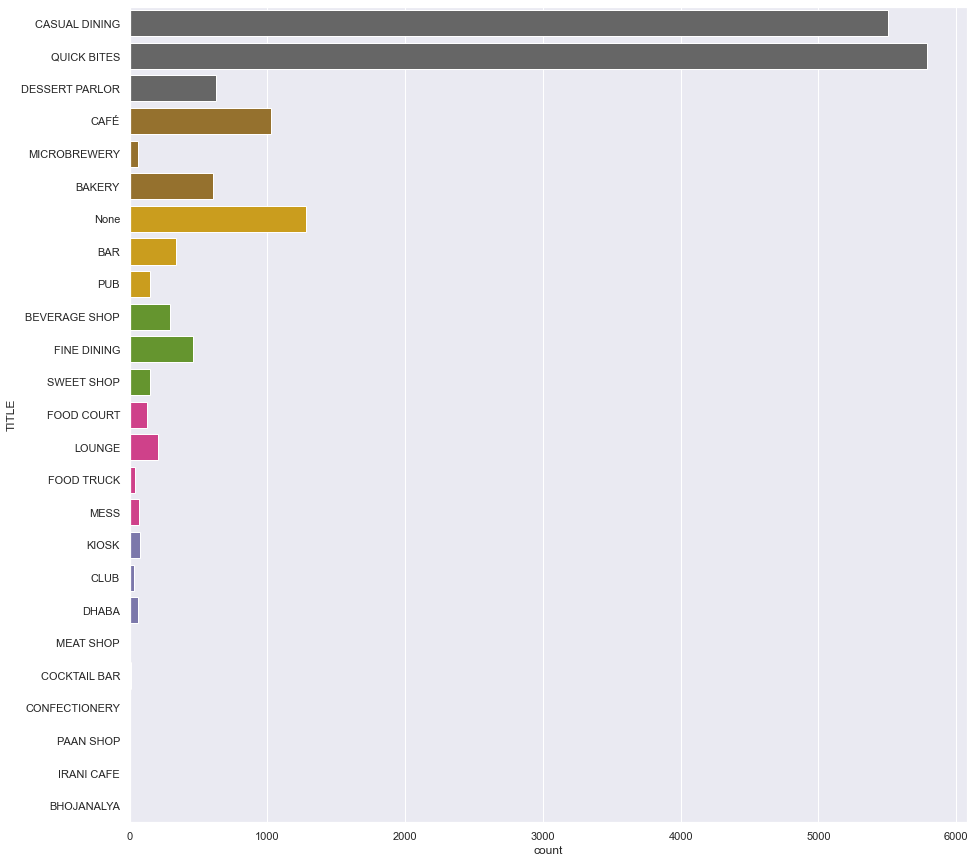

In [81]:
# Figure Size
plt.figure(figsize=(15,15))
# using seaborns countplot
sns.countplot(y="TITLE",data=df_combine,palette="Dark2_r")
# using value counts
df_combine["TITLE"].value_counts()

Casual Dining and Quick Bites are the highest occurring restaurant features in this dataset.

<AxesSubplot:xlabel='COST', ylabel='TITLE'>

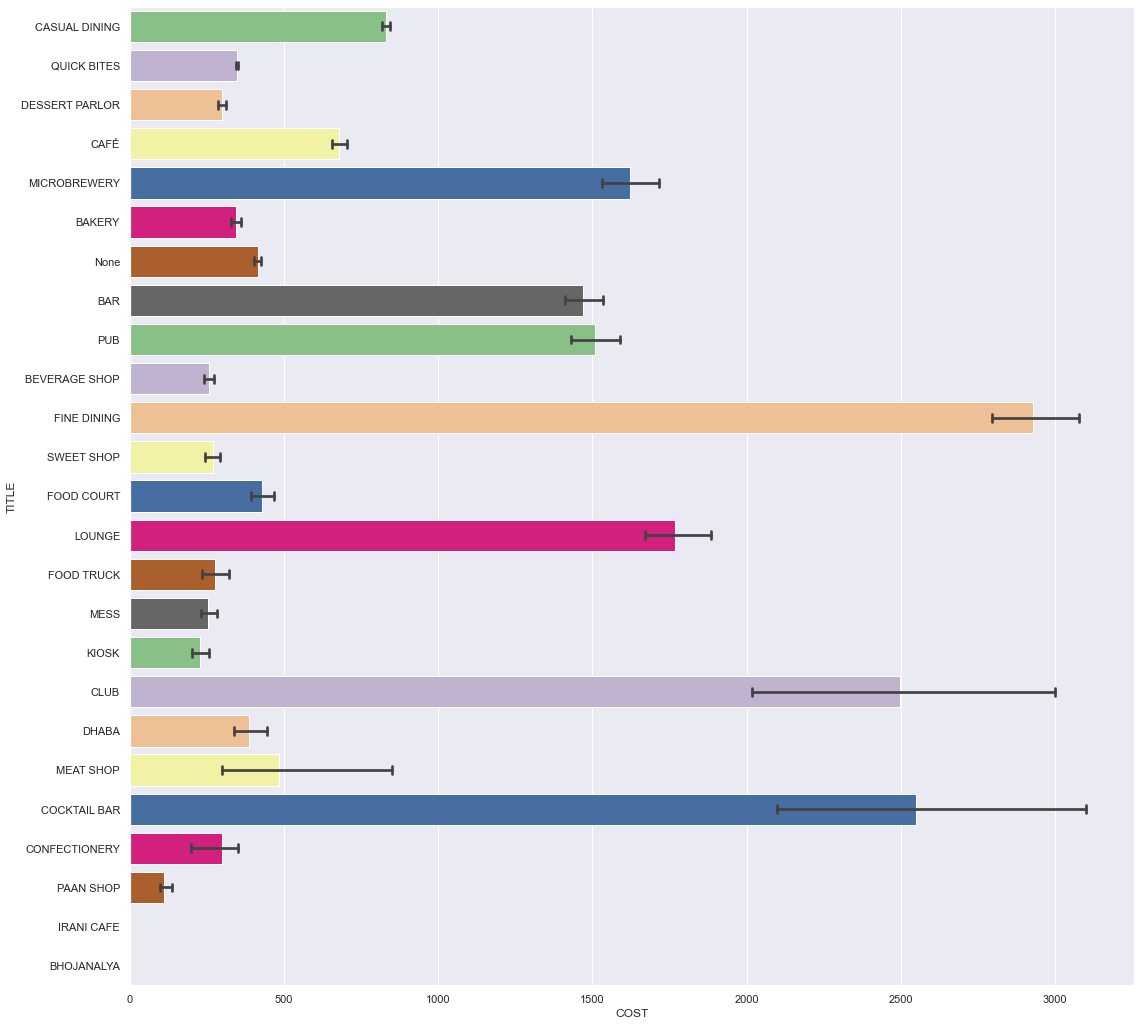

In [82]:
# Figure Size
plt.figure(figsize=(18,18))
# using seaborns barplot
sns.barplot(y="TITLE",x="COST",data=df_combine,capsize=.2,palette="Accent")

Restaurant features like Fine Dining, Club, and Cocktail Bar are quite expensive than other restaurant features.

<AxesSubplot:xlabel='count', ylabel='CUISINES'>

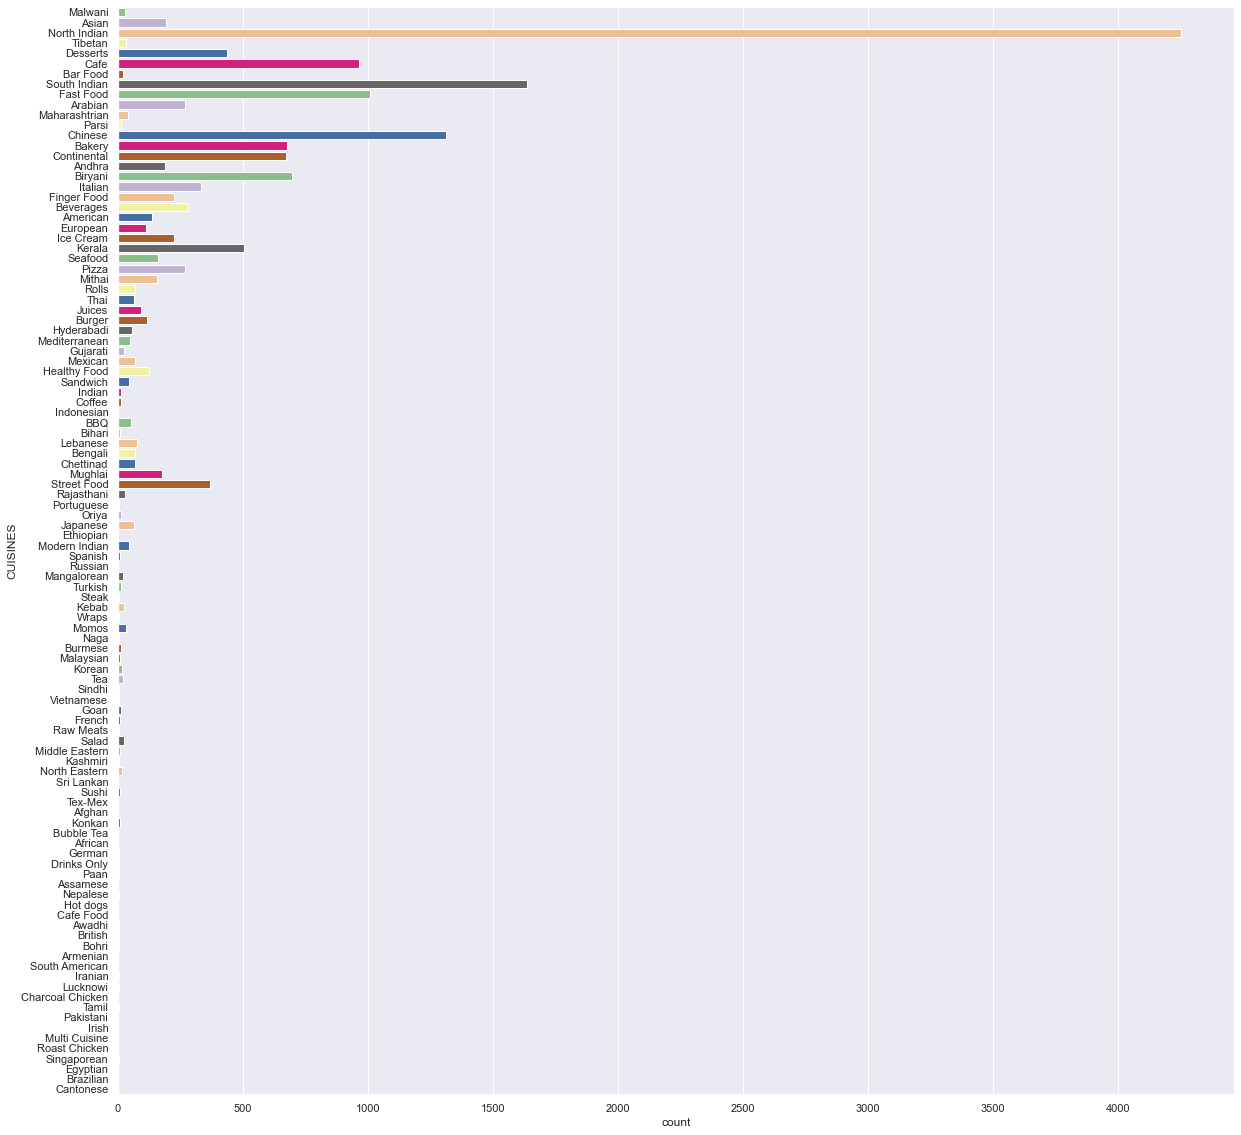

In [83]:
# Figure Size
plt.figure(figsize=(20,20))
# using seaborns countplot
sns.countplot(y="CUISINES",data=df_combine,palette="Accent")

Most of the restaurants are offering North Indian cuisines (maybe they have a high demand). South Indian and Chinese cuisines also have a fair share of demand.

<AxesSubplot:xlabel='COST', ylabel='CUISINES'>

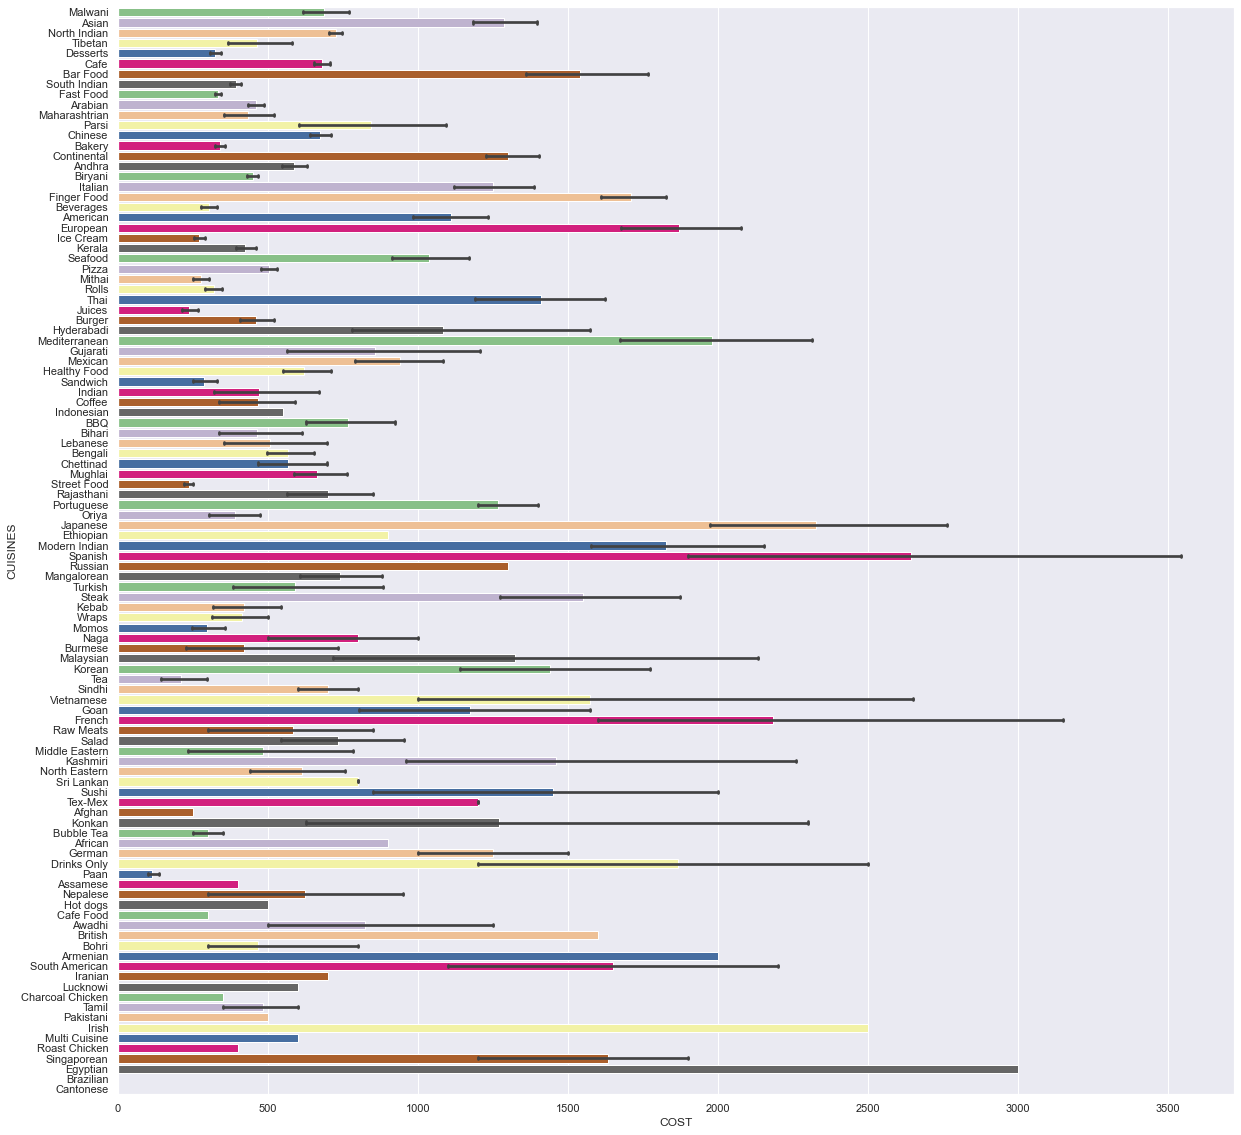

In [84]:
# Figure Size
plt.figure(figsize=(20,20))
# using seaborns barplot
sns.barplot(y="CUISINES",x="COST",data=df_combine,palette="Accent",capsize=.2)

Cuisines like Egyptian, French, Spanish, and Japanese are exorbitant. Paan is the cheapest product in those cuisines.

In [85]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,49.0,1200.0
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165.0,300.0


<AxesSubplot:xlabel='RATING'>

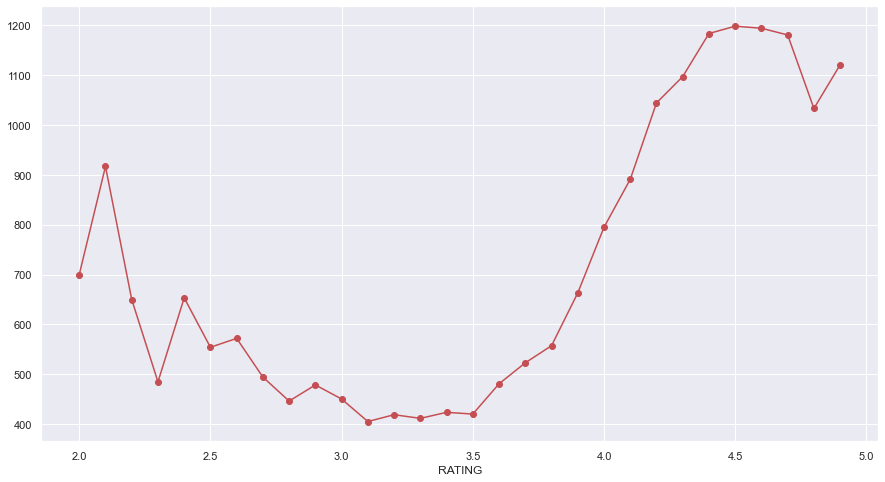

In [86]:
plt.figure(figsize=(15,8))
# Using Groupby
df_combine.groupby("RATING")["COST"].mean().plot(marker="o",color="r")

Restaurants having an average rating of more than 4 are quite expensive.

<AxesSubplot:xlabel='RATING', ylabel='count'>

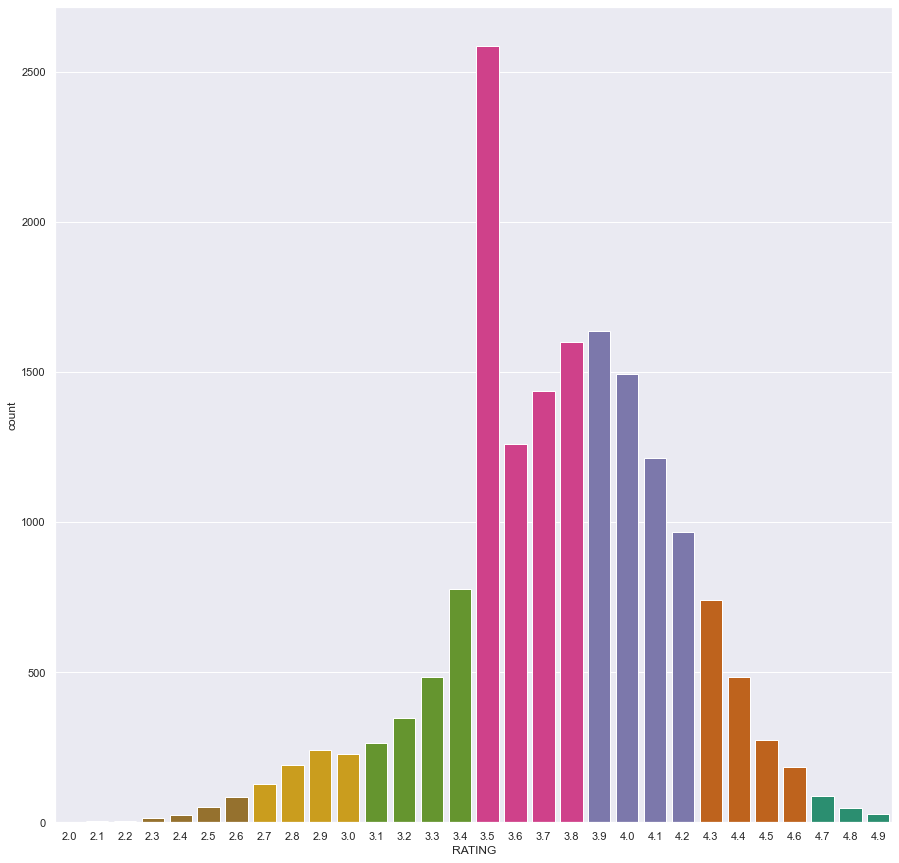

In [87]:
# Figure Size
plt.figure(figsize=(15,15))
# using seaborns countplot
sns.countplot(x="RATING",data=df_combine,palette="Dark2_r")

The average rating for restaurants is ~ 3.5

The highest average rating given by customers is 3.9

<AxesSubplot:xlabel='RATING', ylabel='TITLE'>

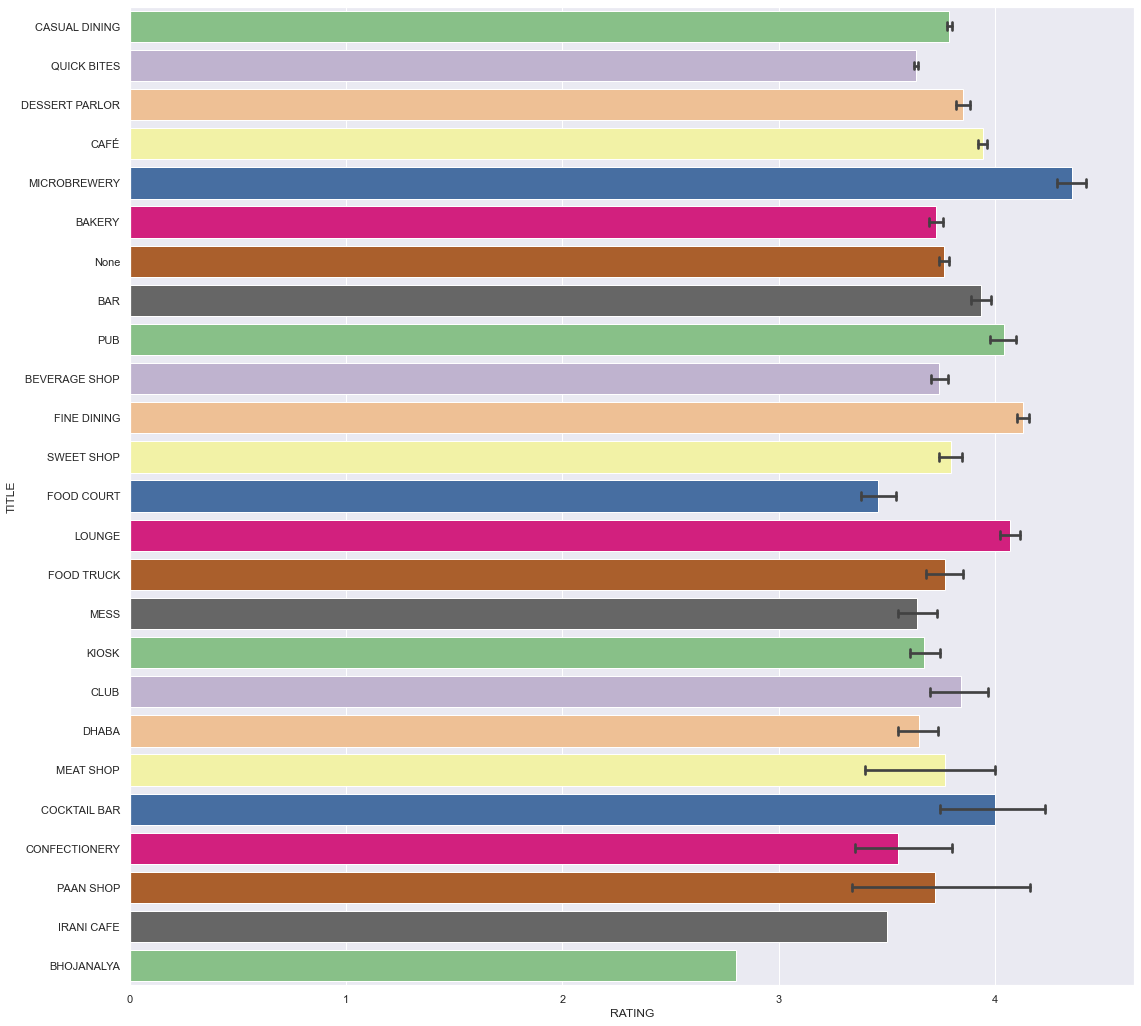

In [88]:
# Figure Size
plt.figure(figsize=(18,18))
# using seaborns barplot
sns.barplot(y="TITLE",x="RATING",data=df_combine,capsize=.2,palette="Accent")

Food Court, Fine dining, Pub, and Microbrewery are very highly rated restaurant features. 

<AxesSubplot:xlabel='RATING', ylabel='CUISINES'>

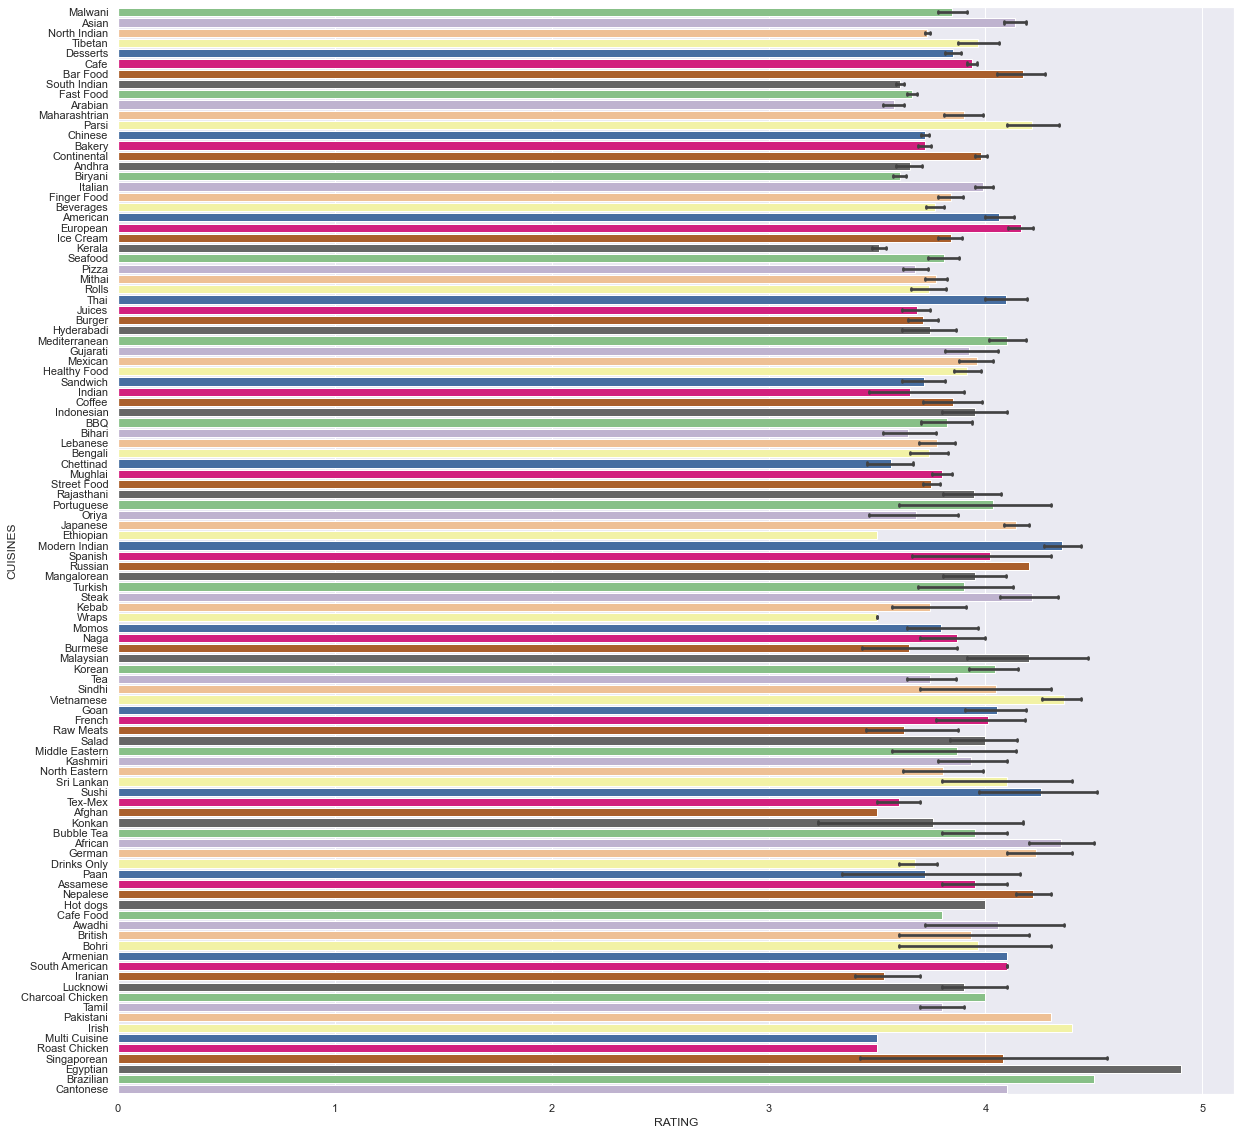

In [89]:
# Figure Size
plt.figure(figsize=(20,20))
# using seaborns barplot
sns.barplot(y="CUISINES",x="RATING",data=df_combine,palette="Accent",capsize=.2)

Egyptian is the highest-rated cuisine in this dataset.

<AxesSubplot:xlabel='VOTES', ylabel='TITLE'>

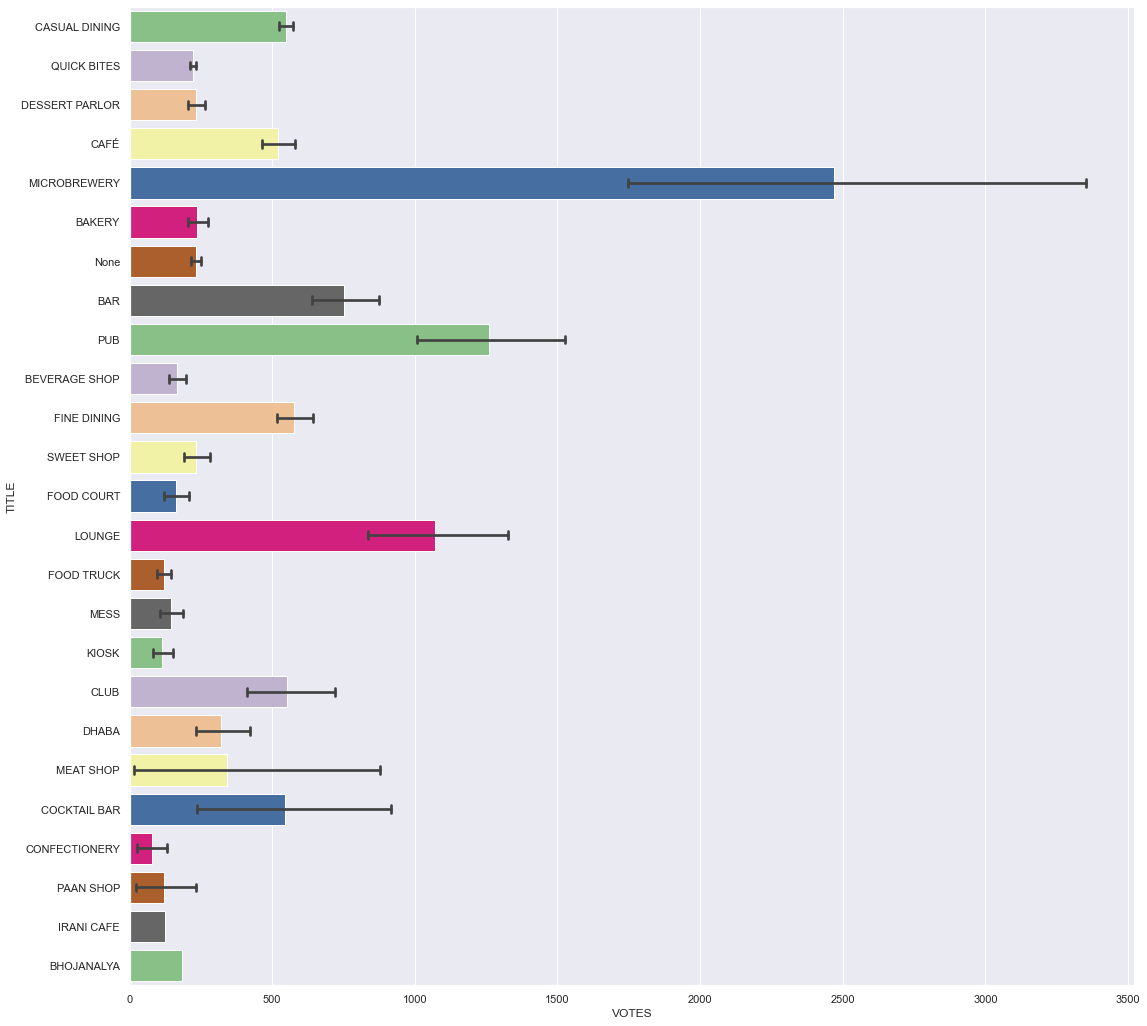

In [90]:
# Figure Size
plt.figure(figsize=(18,18))
# using seaborns barplot
sns.barplot(y="TITLE",x="VOTES",data=df_combine,capsize=.2,palette="Accent")

Microbrewery and Pubs have the highest customer votes.

### Data Cleaning 

### Handling Outliers and transformation

In [91]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,49.0,1200.0
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165.0,300.0


In [92]:
df_combine["RATING"].describe()

count    16895.000000
mean         3.757336
std          0.412918
min          2.000000
25%          3.500000
50%          3.800000
75%          4.000000
max          4.900000
Name: RATING, dtype: float64

In [93]:
# Outlier detection for features which seems normally distributed

def normal(col):
    # Lower outlier
    low = df_combine[col].mean() - 3*df_combine[col].std()
    # Upper outlier
    up = df_combine[col].mean() + 3*df_combine[col].std()
    
    return (low,up)

In [94]:
# features with skewness 

def outSkew(col):
    # Calculating IQR 
    Iqr = df_combine[col].quantile(0.75)-df_combine[col].quantile(0.25)
    
    # Lower outlier
    low = df_combine[col].quantile(0.25)-(Iqr*1.5)
    
    # upper outlier
    up = df_combine[col].quantile(0.75)+(Iqr*1.5)
    
    return (low,up)

In [95]:
# features with very high skewness

def highSKew(col):
    
    # Calculating IQR
    Iqr = df_combine[col].quantile(0.75)-df_combine[col].quantile(0.25)
    
    # First Quartile
    low = df_combine[col].quantile(0.25)-(Iqr*3)
    
    # third Quartile
    up = df_combine[col].quantile(0.75)+(Iqr*3)
    
    return (low,up)

In [96]:
# function to create a boxplot

def boxplot(feature):
    
    plt.figure(figsize=(12,8))
    
    sns.boxplot(x=feature,data=df_combine)

In [97]:
# function to create a histplot

def histplot(feature):
    
    plt.figure(figsize=(12,12))
    
    sns.histplot(x=feature,data=df_combine,kde=True)

In [98]:
from scipy import stats

In [99]:
def QQ_plots(variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df_combine[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df_combine[variable], dist="norm", plot=plt)

    plt.show()

In [100]:
# function for Log transformation

def logt(col):
    df_combine[col] = np.log(df_combine[col]+1)
    return df_combine[col].skew()

In [101]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,49.0,1200.0
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165.0,300.0


### RATING

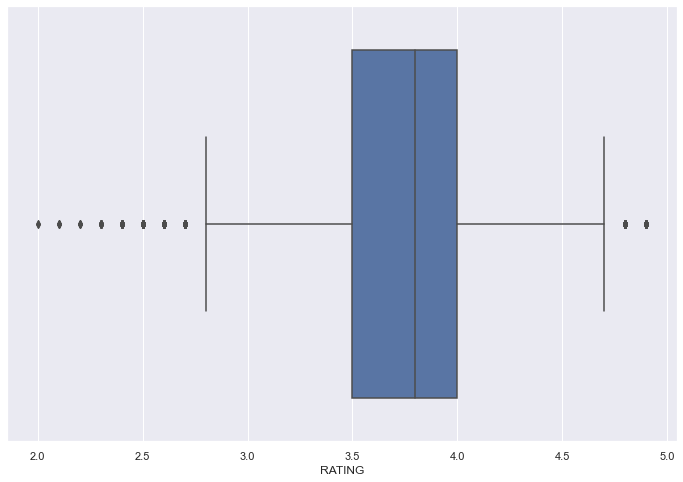

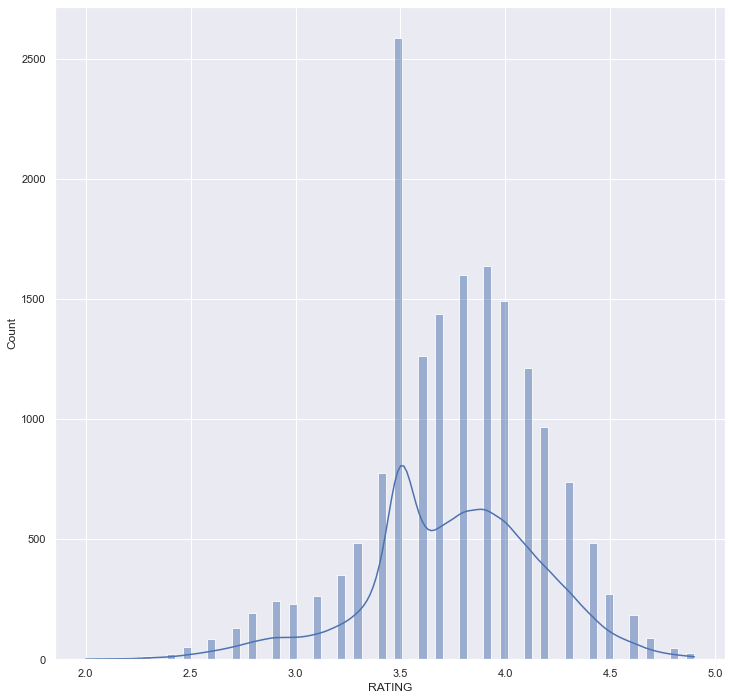

In [102]:
# boxplot for LotFrontage
boxplot("RATING")

print("\n")

# histplot for LotFrontage
histplot("RATING")

In [103]:
# The feature Ratings looks normally distributed

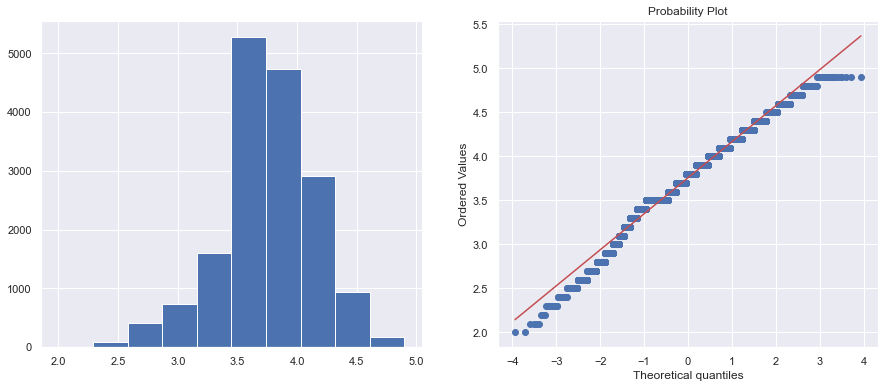

In [104]:
## Checking QQ plot
QQ_plots("RATING")

In [105]:
# Outlier detection
normal("RATING")

(2.518582574620532, 4.996090405551151)

In [106]:
# Anything above 136.18 is considered as an outlier

df_combine.loc[df_combine["RATING"]>=4.99,"RATING"] = 4.99

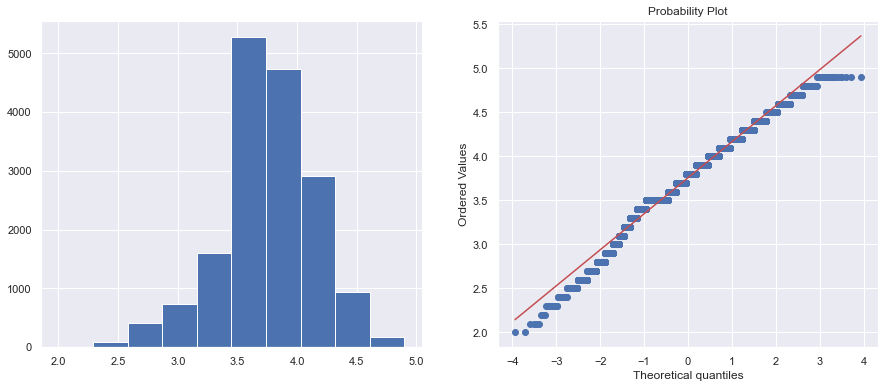

In [107]:
## Checking QQ plot
QQ_plots("RATING")

In [108]:
# Checking Skewness
df_combine["RATING"].skew()

-0.35494357082130945

### VOTES

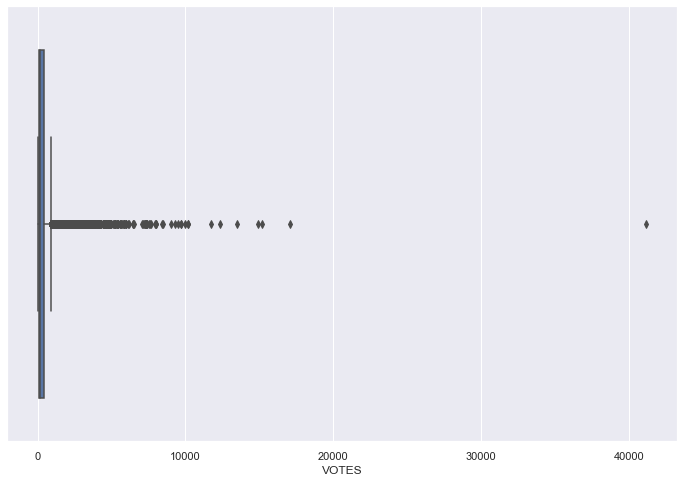

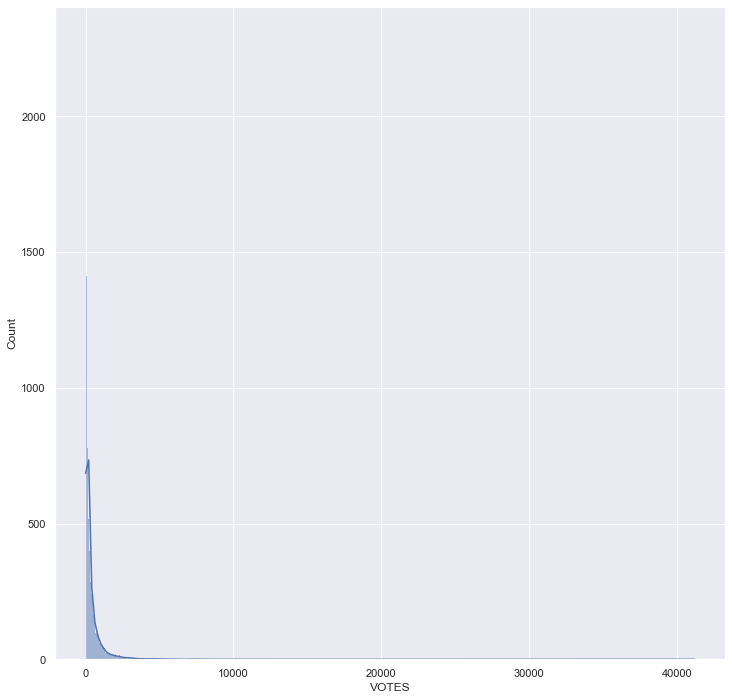

In [109]:
# boxplot for LotArea
boxplot("VOTES")

print("\n")

# histplot for LotArea
histplot("VOTES")

In [110]:
# Looks Normally distributed

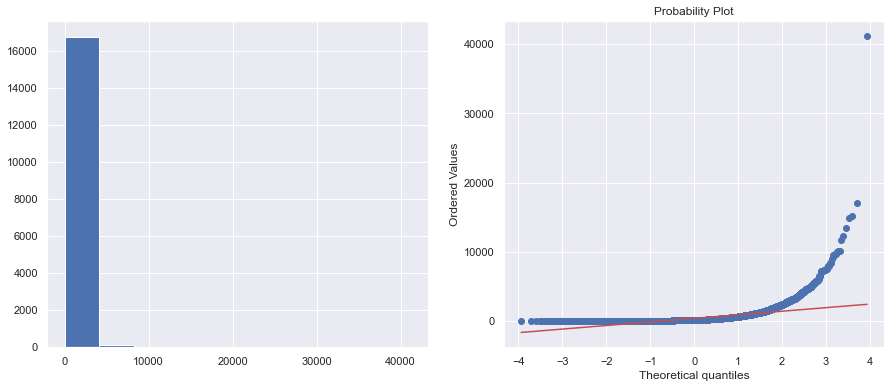

In [111]:
## Checking QQ plot
QQ_plots("VOTES")

In [112]:
normal("VOTES")

(-2014.139854021003, 2804.0246720144924)

In [113]:
# Anything above 2804.02 is considered as an outlier

df_combine.loc[df_combine["VOTES"]>=2804.02,"VOTES"] = 2804.02

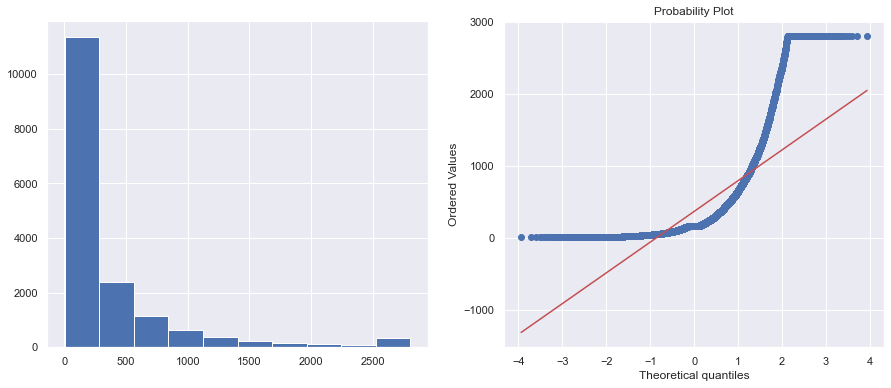

In [114]:
## Checking QQ plot
QQ_plots("VOTES")

In [115]:
df_combine["VOTES"].skew()

2.7831389473962407

In [116]:
logt("VOTES")

-0.0915514280353193

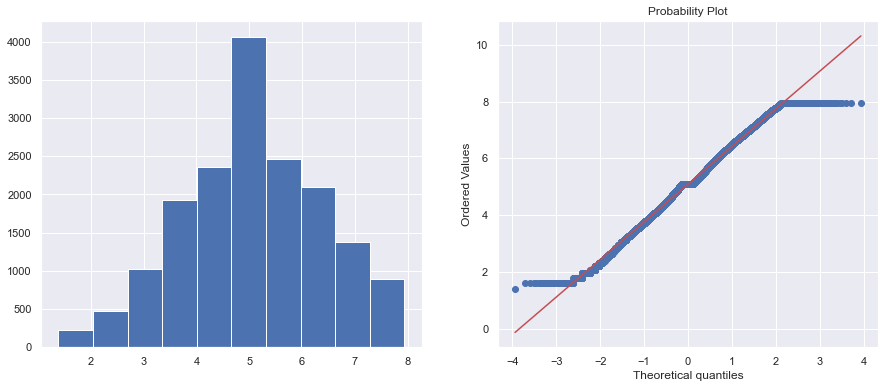

In [117]:
## Checking QQ plot
QQ_plots("VOTES")

In [118]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,3.912023,1200.0
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,3.433987,1500.0
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,5.402677,800.0
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,3.218876,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,5.111988,300.0


### ENCODING

In [119]:
#!pip install category-encoders

In [120]:
from category_encoders import TargetEncoder

In [121]:
encoder = TargetEncoder()

In [122]:
# applying Target encoding on CUISINES column
#df_combine['CUISINES_Encoded'] = encoder.fit_transform(df_combine['CUISINES'], df_combine['COST'])

In [123]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,3.912023,1200.0
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,3.433987,1500.0
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,5.402677,800.0
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,3.218876,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,5.111988,300.0


In [124]:
df_combine[["TITLE_Encoded","CUISINES_Encoded","CITY_Encoded","LOCALITY_Encoded"]] = encoder.fit_transform(df_combine[["TITLE","CUISINES","CITY","LOCALITY"]], df_combine["COST"])

In [125]:
df_combine.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded,LOCALITY_Encoded
0,CASUAL DINING,Malwani,Thane,Dombivali East,3.6,3.912023,1200.0,832.274915,686.842105,661.578947,600.000000
1,CASUAL DINING,Asian,Chennai,Ramapuram,4.2,3.433987,1500.0,832.274915,1287.226277,587.282276,605.434783
2,CASUAL DINING,North Indian,Chennai,Saligramam,3.8,5.402677,800.0,832.274915,725.740385,587.282276,429.132292
3,QUICK BITES,Tibetan,Mumbai,Bandra West,4.1,3.218876,800.0,348.042263,463.461538,866.082896,1271.428571
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,5.111988,300.0,300.251572,324.126506,866.082896,1421.875000


In [126]:
df_combine.isnull().sum()

TITLE                  0
CUISINES               0
CITY                   0
LOCALITY               0
RATING                 0
VOTES                  0
COST                4230
TITLE_Encoded          2
CUISINES_Encoded       2
CITY_Encoded          92
LOCALITY_Encoded     237
dtype: int64

In [127]:
df_combine["TITLE_Encoded"].describe()

count    16893.000000
mean       655.854925
std        497.675879
min        138.247544
25%        348.042263
50%        415.200000
75%        832.274915
max       2929.000000
Name: TITLE_Encoded, dtype: float64

In [128]:
df_combine["TITLE_Encoded"] = df_combine["TITLE_Encoded"].fillna(655.854925) 

In [129]:
df_combine.isnull().sum()

TITLE                  0
CUISINES               0
CITY                   0
LOCALITY               0
RATING                 0
VOTES                  0
COST                4230
TITLE_Encoded          0
CUISINES_Encoded       2
CITY_Encoded          92
LOCALITY_Encoded     237
dtype: int64

In [130]:
df_combine["CUISINES_Encoded"].describe()

count    16893.000000
mean       654.424867
std        351.553443
min        138.247544
25%        392.429839
50%        674.241206
75%        725.740385
max       2637.942912
Name: CUISINES_Encoded, dtype: float64

In [131]:
df_combine["CUISINES_Encoded"] = df_combine["CUISINES_Encoded"].fillna(674.241206) 

In [132]:
df_combine.isnull().sum()

TITLE                  0
CUISINES               0
CITY                   0
LOCALITY               0
RATING                 0
VOTES                  0
COST                4230
TITLE_Encoded          0
CUISINES_Encoded       0
CITY_Encoded          92
LOCALITY_Encoded     237
dtype: int64

In [133]:
df_combine["CITY_Encoded"].describe()

count    16803.000000
mean       657.464681
std        144.652322
min        267.646742
25%        587.282276
50%        655.400790
75%        783.993926
max       1986.519358
Name: CITY_Encoded, dtype: float64

In [134]:
df_combine["CITY_Encoded"] = df_combine["CITY_Encoded"].fillna(655.400790) 

In [135]:
df_combine.isnull().sum()

TITLE                  0
CUISINES               0
CITY                   0
LOCALITY               0
RATING                 0
VOTES                  0
COST                4230
TITLE_Encoded          0
CUISINES_Encoded       0
CITY_Encoded           0
LOCALITY_Encoded     237
dtype: int64

In [136]:
df_combine["LOCALITY_Encoded"].describe()

count    16658.000000
mean       663.554384
std        346.612371
min        195.565300
25%        438.888889
50%        578.571602
75%        768.750000
max       4482.111079
Name: LOCALITY_Encoded, dtype: float64

In [137]:
df_combine["LOCALITY_Encoded"] = df_combine["LOCALITY_Encoded"].fillna(578.571602) 

In [138]:
df_combine.isnull().sum()

TITLE                  0
CUISINES               0
CITY                   0
LOCALITY               0
RATING                 0
VOTES                  0
COST                4230
TITLE_Encoded          0
CUISINES_Encoded       0
CITY_Encoded           0
LOCALITY_Encoded       0
dtype: int64

In [139]:
# applying Target encoding on CUISINES column
#df_combine['CITY_Encoded'] = encoder.fit_transform(df_combine['CITY'], df_combine['COST'])

In [140]:
#df_combine[["TITLE_Encoded","CUISINES_Encoded","CITY_Encoded","LOCALITY_Encoded"]] = encoder.fit_transform(df_combine[["TITLE","CUISINES","CITY","LOCALITY"]], df_combine["COST"])

In [141]:
#df_combine.head()

In [142]:
#df_combine = df_combine.drop(["TITLE","CUISINES","CITY","LOCALITY"],axis=1)

In [143]:
#df_combine.head()

In [144]:
#df_combine.isnull().sum()

In [145]:
df_combine = df_combine.drop(["TITLE","CUISINES","CITY","LOCALITY"],axis=1)

In [146]:
df_combine.isnull().sum()

RATING                 0
VOTES                  0
COST                4230
TITLE_Encoded          0
CUISINES_Encoded       0
CITY_Encoded           0
LOCALITY_Encoded       0
dtype: int64

In [147]:
df_combine.head()

,RATING,VOTES,COST,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded,LOCALITY_Encoded
0,3.6,3.912023,1200.0,832.274915,686.842105,661.578947,600.000000
1,4.2,3.433987,1500.0,832.274915,1287.226277,587.282276,605.434783
2,3.8,5.402677,800.0,832.274915,725.740385,587.282276,429.132292
3,4.1,3.218876,800.0,348.042263,463.461538,866.082896,1271.428571
4,3.8,5.111988,300.0,300.251572,324.126506,866.082896,1421.875000


In [148]:
df_combine = df_combine[['RATING', 'VOTES', 'LOCALITY_Encoded', 'TITLE_Encoded', 'CUISINES_Encoded',
       'CITY_Encoded', 'COST']]

In [149]:
df_combine.head()

,RATING,VOTES,LOCALITY_Encoded,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded,COST
0,3.6,3.912023,600.000000,832.274915,686.842105,661.578947,1200.0
1,4.2,3.433987,605.434783,832.274915,1287.226277,587.282276,1500.0
2,3.8,5.402677,429.132292,832.274915,725.740385,587.282276,800.0
3,4.1,3.218876,1271.428571,348.042263,463.461538,866.082896,800.0
4,3.8,5.111988,1421.875000,300.251572,324.126506,866.082896,300.0


In [150]:
df_combine.shape

(16895, 7)

### Train Test Split 

In [151]:
# we need to seprate the train and test data 
train_df = df_combine.iloc[:12665,:]

In [152]:
train_df.head()

,RATING,VOTES,LOCALITY_Encoded,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded,COST
0,3.6,3.912023,600.000000,832.274915,686.842105,661.578947,1200.0
1,4.2,3.433987,605.434783,832.274915,1287.226277,587.282276,1500.0
2,3.8,5.402677,429.132292,832.274915,725.740385,587.282276,800.0
3,4.1,3.218876,1271.428571,348.042263,463.461538,866.082896,800.0
4,3.8,5.111988,1421.875000,300.251572,324.126506,866.082896,300.0


In [153]:
train_df.isnull().sum()

RATING              0
VOTES               0
LOCALITY_Encoded    0
TITLE_Encoded       0
CUISINES_Encoded    0
CITY_Encoded        0
COST                0
dtype: int64

In [154]:
# test dataframe
test_df= df_combine.iloc[12665:,:]

In [155]:
test_df.head()

,RATING,VOTES,LOCALITY_Encoded,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded,COST
0,4.3,6.336826,1032.758621,832.274915,725.740385,673.459716,NaN
1,4.2,4.127134,542.427872,348.042263,392.429839,866.082896,NaN
2,3.8,5.860786,435.926959,832.274915,725.740385,866.082896,NaN
3,3.8,7.276556,313.750105,415.200000,449.136276,469.240506,NaN
4,3.6,3.178054,345.604396,348.042263,392.429839,433.309859,NaN


In [156]:
test_df.isnull().sum()

RATING                 0
VOTES                  0
LOCALITY_Encoded       0
TITLE_Encoded          0
CUISINES_Encoded       0
CITY_Encoded           0
COST                4230
dtype: int64

In [157]:
# Seprating independent and dependent feature from train dataset
x = train_df.drop("COST",axis=1)
y = train_df["COST"]

In [158]:
x.head()

,RATING,VOTES,LOCALITY_Encoded,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded
0,3.6,3.912023,600.000000,832.274915,686.842105,661.578947
1,4.2,3.433987,605.434783,832.274915,1287.226277,587.282276
2,3.8,5.402677,429.132292,832.274915,725.740385,587.282276
3,4.1,3.218876,1271.428571,348.042263,463.461538,866.082896
4,3.8,5.111988,1421.875000,300.251572,324.126506,866.082896


In [159]:
y.head()

0    1200.0
1    1500.0
2     800.0
3     800.0
4     300.0
Name: COST, dtype: float64

In [160]:
# dropping SalePrice from test data
test_df = test_df.drop("COST",axis=1)

In [161]:
test_df.head()

,RATING,VOTES,LOCALITY_Encoded,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded
0,4.3,6.336826,1032.758621,832.274915,725.740385,673.459716
1,4.2,4.127134,542.427872,348.042263,392.429839,866.082896
2,3.8,5.860786,435.926959,832.274915,725.740385,866.082896
3,3.8,7.276556,313.750105,415.200000,449.136276,469.240506
4,3.6,3.178054,345.604396,348.042263,392.429839,433.309859


## Scaling

In [162]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler

In [163]:
sc = StandardScaler()

In [164]:
# using fit transform of test data
scale_x = sc.fit_transform(x)

In [165]:
x = pd.DataFrame(scale_x,columns=x.columns)

In [166]:
x.head()

,RATING,VOTES,LOCALITY_Encoded,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded
0,-0.385572,-0.883311,-0.181165,0.353842,0.090982,0.027828
1,1.076559,-1.243434,-0.165493,0.353842,1.793259,-0.486257
2,0.101805,0.239659,-0.673870,0.353842,0.201271,-0.486257
3,0.832870,-1.405486,1.754933,-0.614972,-0.542372,1.442864
4,0.101805,0.020671,2.188752,-0.710588,-0.937430,1.442864


In [167]:
# Scaling testing data
scale_test = sc.transform(test_df)

In [168]:
test_df_scaled = pd.DataFrame(scale_test,columns=test_df.columns) 

In [169]:
test_df_scaled.head()

,RATING,VOTES,LOCALITY_Encoded,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded
0,1.320247,0.943390,1.066716,0.353842,0.201271,0.110035
1,1.076559,-0.721259,-0.347177,-0.614972,-0.743769,1.442864
2,0.101805,0.584771,-0.654278,0.353842,0.201271,1.442864
3,0.101805,1.651327,-1.006581,-0.480609,-0.582988,-1.303030
4,-0.385572,-1.436239,-0.914727,-0.614972,-0.743769,-1.551647


### Machine Learning

In [170]:
X = x

In [171]:
X.head()

,RATING,VOTES,LOCALITY_Encoded,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded
0,-0.385572,-0.883311,-0.181165,0.353842,0.090982,0.027828
1,1.076559,-1.243434,-0.165493,0.353842,1.793259,-0.486257
2,0.101805,0.239659,-0.673870,0.353842,0.201271,-0.486257
3,0.832870,-1.405486,1.754933,-0.614972,-0.542372,1.442864
4,0.101805,0.020671,2.188752,-0.710588,-0.937430,1.442864


In [172]:
y.head()

0    1200.0
1    1500.0
2     800.0
3     800.0
4     300.0
Name: COST, dtype: float64

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [175]:
X_train.shape

(8865, 6)

In [176]:
X_test.shape

(3800, 6)

In [177]:
y_train.shape

(8865,)

In [178]:
y_test.shape

(3800,)

#### Linear Regression

In [179]:
# r2 score metrix for regression
from sklearn.metrics import r2_score

In [180]:
# crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [181]:
# sklearn's linear regression 
from sklearn.linear_model import LinearRegression

In [182]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    mod_1 = LinearRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = r2_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")

for random state  0  The training accuracy is : 0.7270688925306137
for random state  0  The testing accuracy is : 0.725881818059738


for random state  1  The training accuracy is : 0.747521080086224
for random state  1  The testing accuracy is : 0.6848042626238802


for random state  2  The training accuracy is : 0.723066224839164
for random state  2  The testing accuracy is : 0.7364232795350925


for random state  3  The training accuracy is : 0.7190627550814446
for random state  3  The testing accuracy is : 0.7460357551496675


for random state  4  The training accuracy is : 0.7495853855920307
for random state  4  The testing accuracy is : 0.6839574814097369


for random state  5  The training accuracy is : 0.7220963535799704
for random state  5  The testing accuracy is : 0.7388010084124622


for random state  6  The training accuracy is : 0.7374096747387424
for random state  6  The testing accuracy is : 0.7046848357509158


for random state  7  The training accuracy is : 0.72310359

for random state  77  The training accuracy is : 0.742320771987899
for random state  77  The testing accuracy is : 0.6905094291524452


for random state  78  The training accuracy is : 0.7432684556151752
for random state  78  The testing accuracy is : 0.6881784570674199


for random state  79  The training accuracy is : 0.722378860289824
for random state  79  The testing accuracy is : 0.7377827706854321


for random state  80  The training accuracy is : 0.7131466789107352
for random state  80  The testing accuracy is : 0.7618522879994293


for random state  81  The training accuracy is : 0.7273545142581508
for random state  81  The testing accuracy is : 0.7222786779839966


for random state  82  The training accuracy is : 0.7191149411565227
for random state  82  The testing accuracy is : 0.7419855339309244


for random state  83  The training accuracy is : 0.7485661056198745
for random state  83  The testing accuracy is : 0.6831319243770454


for random state  84  The training accuracy

In [183]:
# Taking best random state as 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)
mod_1 = LinearRegression() 
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = r2_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)
print("\n")

The training accuracy is : 0.723066224839164
The testing accuracy is : 0.7364232795350925




In [184]:
# regression metrix MSE
from sklearn.metrics import mean_squared_error,mean_absolute_error

#### Mean Square Error

In [185]:
MSE_1 = mean_squared_error(y_test,pred_1)
print(MSE_1)

97445.20134761742


#### Mean Absolute Error

In [187]:
MAE_1 = mean_absolute_error(y_test,pred_1)
print(MAE_1)

197.3114138059339


#### Root Mean Square Error

In [189]:
RMSE_1 = np.sqrt(mean_squared_error(y_test,pred_1))
print(RMSE_1)

312.16213951665793


## Kfold Cross validation 

In [190]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [191]:
kfold_accuracy_LR

0.7313443822134602

In [192]:
score = {"Algorithm":["Linear Regression"],
         "Training_Acc":[train_score_1],
        "R2 Score":[test_score_1],
         "MSE":[MSE_1],
         "MAE":[MAE_1],
         "RMSE":[RMSE_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [193]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.723066,0.736423,97445.201348,197.311414,312.16214,0.731344


### Random Forest Regression

In [194]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    mod_2 = RandomForestRegressor() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = r2_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.9628153949375838
for random state  0  The testing accuracy is : 0.7456071977664339


for random state  1  The training accuracy is : 0.9658709828641293
for random state  1  The testing accuracy is : 0.7084148431326425


for random state  2  The training accuracy is : 0.9626366871466477
for random state  2  The testing accuracy is : 0.7466574440743766


for random state  3  The training accuracy is : 0.9567285899973178
for random state  3  The testing accuracy is : 0.7733584198716384


for random state  4  The training accuracy is : 0.9662280320026112
for random state  4  The testing accuracy is : 0.7052202751290003


for random state  5  The training accuracy is : 0.9640529765030142
for random state  5  The testing accuracy is : 0.7465027735957706


for random state  6  The training accuracy is : 0.9633276984762448
for random state  6  The testing accuracy is : 0.7315246501214708


for random state  7  The training accuracy is : 0.96361

for random state  61  The training accuracy is : 0.9618531459820092
for random state  61  The testing accuracy is : 0.7581107789687227


for random state  62  The training accuracy is : 0.967694041354904
for random state  62  The testing accuracy is : 0.6956862866327844


for random state  63  The training accuracy is : 0.9626561003532593
for random state  63  The testing accuracy is : 0.7560569269483259


for random state  64  The training accuracy is : 0.9652256776191883
for random state  64  The testing accuracy is : 0.7020645029846482


for random state  65  The training accuracy is : 0.961977468013112
for random state  65  The testing accuracy is : 0.7609344521724078


for random state  66  The training accuracy is : 0.9604167965329963
for random state  66  The testing accuracy is : 0.7487109086111121


for random state  67  The training accuracy is : 0.9593788150839454
for random state  67  The testing accuracy is : 0.739768197026883


for random state  68  The training accuracy 

In [196]:
# Taking the best random state as 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)
mod_2 = RandomForestRegressor() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = r2_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.9635614754010844
The testing accuracy is : 0.7798946696505062




#### Mean Square Error

In [197]:
MSE_2 = mean_squared_error(y_test,pred_2)
print(MSE_2)

85875.9974802138


#### Mean Absolute Error

In [198]:
MAE_2 = mean_absolute_error(y_test,pred_2)
print(MAE_2)

177.7121235192439


#### Root Mean Square Error

In [199]:
RMSE_2 = np.sqrt(mean_squared_error(y_test,pred_2))
print(RMSE_2)

293.0460671638741


### K fold Cross Validation

In [200]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [201]:
kfold_accuracy_RFR

0.7391212583589756

In [202]:
score = {"Algorithm":["Linear Regression","Random Forest Regression"],
         "Training_Acc":[train_score_1,train_score_2],
        "R2 Score":[test_score_1,test_score_2],
         "MSE":[MSE_1,MSE_2],
         "MAE":[MAE_1,MAE_2],
         "RMSE":[RMSE_1,RMSE_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [203]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.723066,0.736423,97445.201348,197.311414,312.162140,0.731344
1,Random Forest Regression,0.963561,0.779895,85875.997480,177.712124,293.046067,0.739121


### Gradient Bosting Regressor

In [204]:
from sklearn.ensemble import GradientBoostingRegressor

In [205]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    mod_3 = GradientBoostingRegressor() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = r2_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 0.7933162698334993
for random state  0  The testing accuracy is : 0.7592938059153909


for random state  1  The training accuracy is : 0.8188673482769869
for random state  1  The testing accuracy is : 0.7033426934487794


for random state  2  The training accuracy is : 0.8008422613582108
for random state  2  The testing accuracy is : 0.7476740358933067


for random state  3  The training accuracy is : 0.790268273534369
for random state  3  The testing accuracy is : 0.7821100747388269


for random state  4  The training accuracy is : 0.8187007615129536
for random state  4  The testing accuracy is : 0.7076247817247081


for random state  5  The training accuracy is : 0.8038788490543501
for random state  5  The testing accuracy is : 0.7628646029801599


for random state  6  The training accuracy is : 0.8123677365449044
for random state  6  The testing accuracy is : 0.7338235762555666


for random state  7  The training accuracy is : 0.791654

for random state  61  The training accuracy is : 0.790847021625093
for random state  61  The testing accuracy is : 0.7675212729905357


for random state  62  The training accuracy is : 0.8255150897978281
for random state  62  The testing accuracy is : 0.7016890103497007


for random state  63  The training accuracy is : 0.7990346708294332
for random state  63  The testing accuracy is : 0.762494562161282


for random state  64  The training accuracy is : 0.8197040724542947
for random state  64  The testing accuracy is : 0.7013705853873402


for random state  65  The training accuracy is : 0.7937304290469857
for random state  65  The testing accuracy is : 0.7803289537258221


for random state  66  The training accuracy is : 0.793635580875742
for random state  66  The testing accuracy is : 0.7655568753134728


for random state  67  The training accuracy is : 0.7963707821192583
for random state  67  The testing accuracy is : 0.7486150689968902


for random state  68  The training accuracy 

In [206]:
# using the best random state as 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)
mod_3 = GradientBoostingRegressor() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = r2_score(y_test,pred_3)
    
print("The training accuracy is :",train_score_3)
print("The testing accuracy is :",test_score_3)
print("\n")

The training accuracy is : 0.7966219862580033
The testing accuracy is : 0.780624304257133




#### Mean Square Error

In [207]:
MSE_3 = mean_squared_error(y_test,pred_3)
print(MSE_3)

85591.32423063525


#### Mean Absolute Error

In [208]:
MAE_3 = mean_absolute_error(y_test,pred_3)
print(MAE_3)

178.8061536768963


#### Root Mean Square Error

In [209]:
RMSE_3 = np.sqrt(mean_absolute_error(y_test,pred_3))
print(RMSE_3)

13.371841820665404


### Kfold Crrossvalidation

In [210]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [211]:
kfold_accuracy_GB

0.7557440315275624

In [212]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                      "Gradient Boosting"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3],
        "R2 Score":[test_score_1,test_score_2,test_score_3],
         "MSE":[MSE_1,MSE_2,MSE_3],
         "MAE":[MAE_1,MAE_2,MAE_3],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [213]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.723066,0.736423,97445.201348,197.311414,312.162140,0.731344
1,Random Forest Regression,0.963561,0.779895,85875.997480,177.712124,293.046067,0.739121
2,Gradient Boosting,0.796622,0.780624,85591.324231,178.806154,13.371842,0.755744


### ADA Boosting regressor

In [214]:
from sklearn.ensemble import AdaBoostRegressor

In [215]:
# using for loop to get best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    mod_4 = AdaBoostRegressor() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = r2_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 0.4787957796495529
for random state  0  The testing accuracy is : 0.3997892353339375


for random state  1  The training accuracy is : 0.4451559571158671
for random state  1  The testing accuracy is : 0.40915656367106246


for random state  2  The training accuracy is : 0.3685125014165852
for random state  2  The testing accuracy is : 0.25524827591308064


for random state  3  The training accuracy is : 0.3937909945661129
for random state  3  The testing accuracy is : 0.34405476226329634


for random state  4  The training accuracy is : 0.7152543145358383
for random state  4  The testing accuracy is : 0.641444141156901


for random state  5  The training accuracy is : 0.4046461189943754
for random state  5  The testing accuracy is : 0.2935566008328593


for random state  6  The training accuracy is : 0.34942770757704356
for random state  6  The testing accuracy is : 0.302187029715393


for random state  7  The training accuracy is : 0.739

for random state  60  The training accuracy is : 0.3720716441419941
for random state  60  The testing accuracy is : 0.35406260354048447


for random state  61  The training accuracy is : 0.33216489004801
for random state  61  The testing accuracy is : 0.3638992678130796


for random state  62  The training accuracy is : 0.5574259427728084
for random state  62  The testing accuracy is : 0.4665421397670161


for random state  63  The training accuracy is : 0.5145549883739303
for random state  63  The testing accuracy is : 0.4807387931377072


for random state  64  The training accuracy is : 0.4641387686919233
for random state  64  The testing accuracy is : 0.3941645024333644


for random state  65  The training accuracy is : 0.5027682089982581
for random state  65  The testing accuracy is : 0.42555452150484263


for random state  66  The training accuracy is : 0.6572203660949936
for random state  66  The testing accuracy is : 0.6123360241254265


for random state  67  The training accura

In [218]:
# Taking the best random state as 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
mod_4 = AdaBoostRegressor() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = r2_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")

The training accuracy is : 0.45134692245401753
The testing accuracy is : 0.4376373496969539




#### Mean Square Error

In [219]:
MSE_4 = mean_squared_error(y_test,pred_4)
print(MSE_4)

231722.54999312834


#### Mean Absolute Error

In [220]:
MAE_4 = mean_absolute_error(y_test,pred_4)
print(MAE_4)

396.9200186169052


#### Root Mean Square Error

In [221]:
RMSE_4 = np.sqrt(mean_squared_error(y_test,pred_4))
print(RMSE_4)

481.3756848794176


### K fold Cross Validation

In [222]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [223]:
kfold_accuracy_ADA

0.35678292536863876

In [224]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4],
         "MAE":[MAE_1,MAE_2,MAE_3,MAE_4],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3,RMSE_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [225]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.723066,0.736423,97445.201348,197.311414,312.162140,0.731344
1,Random Forest Regression,0.963561,0.779895,85875.997480,177.712124,293.046067,0.739121
2,Gredient Boosting,0.796622,0.780624,85591.324231,178.806154,13.371842,0.755744
3,ADA Boost,0.451347,0.437637,231722.549993,396.920019,481.375685,0.356783


### Bagging Regressor

In [226]:
from sklearn.ensemble import BaggingRegressor

In [227]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    mod_6 = BaggingRegressor() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = r2_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.9499723704319931
for random state  0  The testing accuracy is : 0.7049415383604911


for random state  1  The training accuracy is : 0.9558250034698406
for random state  1  The testing accuracy is : 0.6978258296559577


for random state  2  The training accuracy is : 0.9416336325106971
for random state  2  The testing accuracy is : 0.7207169467019341


for random state  3  The training accuracy is : 0.9475602485998775
for random state  3  The testing accuracy is : 0.7499130786985128


for random state  4  The training accuracy is : 0.9532029302078627
for random state  4  The testing accuracy is : 0.6924949892454506


for random state  5  The training accuracy is : 0.9468011290768663
for random state  5  The testing accuracy is : 0.7382814224069267


for random state  6  The training accuracy is : 0.9563553276614176
for random state  6  The testing accuracy is : 0.7057288040053542


for random state  7  The training accuracy is : 0.94764

for random state  61  The training accuracy is : 0.9540263022644121
for random state  61  The testing accuracy is : 0.7417502123498374


for random state  62  The training accuracy is : 0.9555310608691927
for random state  62  The testing accuracy is : 0.679008993257894


for random state  63  The training accuracy is : 0.9519094156407669
for random state  63  The testing accuracy is : 0.7340024256289601


for random state  64  The training accuracy is : 0.9568939701921761
for random state  64  The testing accuracy is : 0.6742209495978371


for random state  65  The training accuracy is : 0.9434201103214717
for random state  65  The testing accuracy is : 0.742233191616481


for random state  66  The training accuracy is : 0.9481537001659792
for random state  66  The testing accuracy is : 0.7202714229270308


for random state  67  The training accuracy is : 0.946164777843289
for random state  67  The testing accuracy is : 0.7482815745314464


for random state  68  The training accuracy 

In [228]:
# The best random state is 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)
mod_6 = BaggingRegressor() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = r2_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.9476812665107032
The testing accuracy is : 0.7617035165064836




#### Mean Square Error

In [229]:
MSE_6 = mean_squared_error(y_test,pred_6)
print(MSE_6)

90853.12596128485


#### Mean ABsolute Error

In [230]:
MAE_6 = mean_absolute_error(y_test,pred_6)
print(MAE_6)

187.93221846647506


#### Root Mean Square Error

In [231]:
RMSE_6 = np.sqrt(mean_squared_error(y_test,pred_6))
print(RMSE_6)

301.4185229233347


### Kfold Cross Validation

In [232]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_BR = np.mean(abs(K_results))

In [233]:
kfold_accuracy_BR

0.7154853457468633

In [234]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost","Bagging Regressor"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_6],
         "MAE":[MAE_1,MAE_2,MAE_3,MAE_4,MAE_6],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,
                           kfold_accuracy_BR]}

final_card = pd.DataFrame(score)

In [235]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.723066,0.736423,97445.201348,197.311414,312.162140,0.731344
1,Random Forest Regression,0.963561,0.779895,85875.997480,177.712124,293.046067,0.739121
2,Gredient Boosting,0.796622,0.780624,85591.324231,178.806154,13.371842,0.755744
3,ADA Boost,0.451347,0.437637,231722.549993,396.920019,481.375685,0.356783
4,Bagging Regressor,0.947681,0.761704,90853.125961,187.932218,301.418523,0.715485


### XGBRegressor

In [236]:
from xgboost import XGBRegressor

In [237]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    mod_7 = XGBRegressor() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = r2_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.9382931678847254
for random state  0  The testing accuracy is : 0.7447518327093332


for random state  1  The training accuracy is : 0.9394592767184367
for random state  1  The testing accuracy is : 0.6852199275270521


for random state  2  The training accuracy is : 0.9370200927731724
for random state  2  The testing accuracy is : 0.7357036656049143


for random state  3  The training accuracy is : 0.9402170726230925
for random state  3  The testing accuracy is : 0.7695330998090837


for random state  4  The training accuracy is : 0.9354203864726736
for random state  4  The testing accuracy is : 0.6992356774738646


for random state  5  The training accuracy is : 0.94143530536537
for random state  5  The testing accuracy is : 0.7458898387440207


for random state  6  The training accuracy is : 0.934895098865769
for random state  6  The testing accuracy is : 0.7192980871078358


for random state  7  The training accuracy is : 0.93927281

for random state  61  The training accuracy is : 0.934153087003054
for random state  61  The testing accuracy is : 0.7438229615284596


for random state  62  The training accuracy is : 0.9387357741227228
for random state  62  The testing accuracy is : 0.6865565838320322


for random state  63  The training accuracy is : 0.9413141317147645
for random state  63  The testing accuracy is : 0.7463430071851


for random state  64  The training accuracy is : 0.9382941795954451
for random state  64  The testing accuracy is : 0.677234978925462


for random state  65  The training accuracy is : 0.9370993582791448
for random state  65  The testing accuracy is : 0.7507172262299553


for random state  66  The training accuracy is : 0.9370163635413189
for random state  66  The testing accuracy is : 0.7270324548243665


for random state  67  The training accuracy is : 0.9394012068107704
for random state  67  The testing accuracy is : 0.7526135059187047


for random state  68  The training accuracy is

In [238]:
# Taking the best random state as 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)
mod_7 = XGBRegressor() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = r2_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.9408517850566404
The testing accuracy is : 0.76094800786125




#### Mean Square Error

In [239]:
MSE_7 = mean_squared_error(y_test,pred_7)
print(MSE_7)

91141.1718489285


#### Mean Absolute Error

In [240]:
MAE_7 = mean_absolute_error(y_test,pred_7)
print(MAE_7)

182.1359970414011


#### Root Mean Square Error

In [241]:
RMSE_7 = np.sqrt(mean_squared_error(y_test,pred_7))
print(RMSE_7)

301.8959619619456


### K fold Cross Validation

In [242]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_XG = np.mean(abs(K_results))

In [243]:
kfold_accuracy_XG

0.7264628533994896

In [244]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost","Bagging Regressor",
                     "XGB Regressor"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_6,MSE_7],
         "MAE":[MAE_1,MAE_2,MAE_3,MAE_4,MAE_6,MAE_7],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_6,RMSE_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,
                           kfold_accuracy_BR,
                           kfold_accuracy_XG]}

final_card = pd.DataFrame(score)

In [245]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.723066,0.736423,97445.201348,197.311414,312.162140,0.731344
1,Random Forest Regression,0.963561,0.779895,85875.997480,177.712124,293.046067,0.739121
2,Gredient Boosting,0.796622,0.780624,85591.324231,178.806154,13.371842,0.755744
3,ADA Boost,0.451347,0.437637,231722.549993,396.920019,481.375685,0.356783
4,Bagging Regressor,0.947681,0.761704,90853.125961,187.932218,301.418523,0.715485
5,XGB Regressor,0.940852,0.760948,91141.171849,182.135997,301.895962,0.726463


### Regularization

####  Lasso

In [246]:
from sklearn.linear_model import Lasso

In [247]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    mod_8 = Lasso() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = r2_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.7270631136667036
for random state  0  The testing accuracy is : 0.7260169200632017


for random state  1  The training accuracy is : 0.7475148302912877
for random state  1  The testing accuracy is : 0.684687062353371


for random state  2  The training accuracy is : 0.7230604854668475
for random state  2  The testing accuracy is : 0.7364787199993049


for random state  3  The training accuracy is : 0.7190568669490534
for random state  3  The testing accuracy is : 0.7460239507662725


for random state  4  The training accuracy is : 0.7495788391952742
for random state  4  The testing accuracy is : 0.6838628776449205


for random state  5  The training accuracy is : 0.7220905347513183
for random state  5  The testing accuracy is : 0.7389792194010121


for random state  6  The training accuracy is : 0.7374034642562068
for random state  6  The testing accuracy is : 0.7047081876295321


for random state  7  The training accuracy is : 0.723097

for random state  66  The training accuracy is : 0.7219968815808847
for random state  66  The testing accuracy is : 0.7387979172712027


for random state  67  The training accuracy is : 0.7211265114273084
for random state  67  The testing accuracy is : 0.7385757206943042


for random state  68  The training accuracy is : 0.7263340942048961
for random state  68  The testing accuracy is : 0.7281136643457427


for random state  69  The training accuracy is : 0.7460406588183904
for random state  69  The testing accuracy is : 0.68473463214233


for random state  70  The training accuracy is : 0.7257856644451546
for random state  70  The testing accuracy is : 0.7292391174084745


for random state  71  The training accuracy is : 0.724886900877435
for random state  71  The testing accuracy is : 0.7312682876939967


for random state  72  The training accuracy is : 0.7207842838019558
for random state  72  The testing accuracy is : 0.7416691784219172


for random state  73  The training accuracy 

In [248]:
# Taking the best random state as 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
mod_8 = Lasso() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = r2_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.7272739818291643
The testing accuracy is : 0.7252466654362514




#### Mean Squared Error

In [249]:
MSE_8 = mean_squared_error(y_test,pred_8)
print(MSE_8)

104883.12561345812


#### Mean Absolute Error

In [250]:
MAE_8 = mean_absolute_error(y_test,pred_8)
print(MAE_8)

199.8173616513691


#### Root Mean Square Error

In [251]:
RMSE_8 = np.sqrt(mean_squared_error(y_test,pred_8))
print(RMSE_8)

323.8566436148225


### Kfold Cross Validation

In [252]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_Lasso = np.mean(abs(K_results))

In [253]:
kfold_accuracy_Lasso

0.731356346765333

In [254]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost","Bagging Regressor",
                     "XGB Regressor","Lasso"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7,
                        train_score_8],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7,
                   test_score_8],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_6,MSE_7,MSE_8],
         "MAE":[MAE_1,MAE_2,MAE_3,MAE_4,MAE_6,MAE_7,MAE_8],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_6,RMSE_7,RMSE_8],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,
                           kfold_accuracy_BR,
                           kfold_accuracy_XG,kfold_accuracy_Lasso]}

final_card = pd.DataFrame(score)

In [255]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.723066,0.736423,97445.201348,197.311414,312.162140,0.731344
1,Random Forest Regression,0.963561,0.779895,85875.997480,177.712124,293.046067,0.739121
2,Gredient Boosting,0.796622,0.780624,85591.324231,178.806154,13.371842,0.755744
3,ADA Boost,0.451347,0.437637,231722.549993,396.920019,481.375685,0.356783
4,Bagging Regressor,0.947681,0.761704,90853.125961,187.932218,301.418523,0.715485
5,XGB Regressor,0.940852,0.760948,91141.171849,182.135997,301.895962,0.726463
6,Lasso,0.727274,0.725247,104883.125613,199.817362,323.856644,0.731356


## Ridge

In [256]:
from sklearn.linear_model import Ridge

In [257]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    mod_9 = Ridge() 
    mod_9.fit(X_train,y_train)
    train_score_9 = mod_9.score(X_train,y_train)
    pred_9 = mod_9.predict(X_test)
    test_score_9 = r2_score(y_test,pred_9)
    
    print("for random state ",i," The training accuracy is :",train_score_9)
    print("for random state ",i," The testing accuracy is :",test_score_9)
    print("\n")

for random state  0  The training accuracy is : 0.7270688877148034
for random state  0  The testing accuracy is : 0.7258849394613387


for random state  1  The training accuracy is : 0.7475210751348604
for random state  1  The testing accuracy is : 0.6847990071631889


for random state  2  The training accuracy is : 0.7230662200899678
for random state  2  The testing accuracy is : 0.7364235670853244


for random state  3  The training accuracy is : 0.7190627502016844
for random state  3  The testing accuracy is : 0.7460371727635422


for random state  4  The training accuracy is : 0.7495853804466409
for random state  4  The testing accuracy is : 0.6839532335676022


for random state  5  The training accuracy is : 0.7220963485714696
for random state  5  The testing accuracy is : 0.7388087034255828


for random state  6  The training accuracy is : 0.7374096697371572
for random state  6  The testing accuracy is : 0.70468320774247


for random state  7  The training accuracy is : 0.7231035



for random state  61  The training accuracy is : 0.7205314232009439
for random state  61  The testing accuracy is : 0.7394217121465494


for random state  62  The training accuracy is : 0.7487087499117624
for random state  62  The testing accuracy is : 0.6752467061546019


for random state  63  The training accuracy is : 0.7170148592302803
for random state  63  The testing accuracy is : 0.7497383999618419


for random state  64  The training accuracy is : 0.7440107808501485
for random state  64  The testing accuracy is : 0.6904594166217599


for random state  65  The training accuracy is : 0.7228998184940933
for random state  65  The testing accuracy is : 0.7369404252607243


for random state  66  The training accuracy is : 0.722002587324064
for random state  66  The testing accuracy is : 0.7388584683313445


for random state  67  The training accuracy is : 0.7211327977496553
for random state  67  The testing accuracy is : 0.7386748117505395


for random state  68  The training accur

In [258]:
# taking the best random state as 11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)
mod_9 = Ridge() 
mod_9.fit(X_train,y_train)
train_score_9 = mod_9.score(X_train,y_train)
pred_9 = mod_9.predict(X_test)
test_score_9 = r2_score(y_test,pred_9)
    
print("The training accuracy is :",train_score_9)
print("The testing accuracy is :",test_score_9)
print("\n")

The training accuracy is : 0.7213194723982252
The testing accuracy is : 0.7396331995055245




#### Mean Square Error

In [259]:
MSE_9 = mean_squared_error(y_test,pred_9)
print(MSE_9)

102864.06041773634


#### Mean Absolute Error

In [260]:
MAE_9 = mean_absolute_error(y_test,pred_9)
print(MAE_9)

198.38259492616186


#### Root Mean Square Error

In [261]:
RMSE_9 = np.sqrt(mean_squared_error(y_test,pred_9))
print(RMSE_9)

320.7242747559597


### K fold Cross Validation

In [262]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_9,X,y,cv=kfold)

kfold_accuracy_Ridge = np.mean(abs(K_results))

In [263]:
kfold_accuracy_Ridge

0.7313453210317722

In [264]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost","Bagging Regressor",
                     "XGB Regressor","Lasso","Ridge"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7,
                        train_score_8,train_score_9],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7,
                   test_score_8,test_score_9],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_6,MSE_7,MSE_8,MSE_9],
         "MAE":[MAE_1,MAE_2,MAE_3,MAE_4,MAE_6,MAE_7,MAE_8,MAE_9],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_6,RMSE_7,RMSE_8,RMSE_9],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,
                           kfold_accuracy_BR,
                           kfold_accuracy_XG,kfold_accuracy_Lasso,
                           kfold_accuracy_Ridge]}

final_card = pd.DataFrame(score)

In [265]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.723066,0.736423,97445.201348,197.311414,312.162140,0.731344
1,Random Forest Regression,0.963561,0.779895,85875.997480,177.712124,293.046067,0.739121
2,Gredient Boosting,0.796622,0.780624,85591.324231,178.806154,13.371842,0.755744
3,ADA Boost,0.451347,0.437637,231722.549993,396.920019,481.375685,0.356783
4,Bagging Regressor,0.947681,0.761704,90853.125961,187.932218,301.418523,0.715485
5,XGB Regressor,0.940852,0.760948,91141.171849,182.135997,301.895962,0.726463
6,Lasso,0.727274,0.725247,104883.125613,199.817362,323.856644,0.731356
7,Ridge,0.721319,0.739633,102864.060418,198.382595,320.724275,0.731345


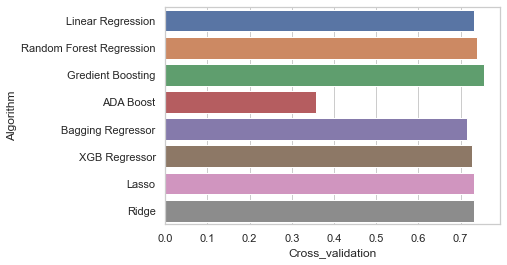

In [266]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

### From all the machine learning models Gredient Boosting Regression is having the best results based upon cross validation scores

### Hyperparametric Tuning

#### Random Search CV

### Gredient Boosting (HT)

In [271]:
from sklearn.model_selection import RandomizedSearchCV

In [267]:
parameters_GB = {"n_estimators":[50,100,200,300,400],
              "learning_rate":[0.01,0.05,0.1,0.3,0.5],
              "max_depth":[3,4,5,6,7],
              "min_samples_split":[2,5,8,10,12],
             "max_features":['auto','sqrt'],
              "min_samples_leaf":[1,3,5,6,7]}

In [268]:
parameters_GB

{'n_estimators': [50, 100, 200, 300, 400],
 'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
 'max_depth': [3, 4, 5, 6, 7],
 'min_samples_split': [2, 5, 8, 10, 12],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 5, 6, 7]}

In [269]:
GB = GradientBoostingRegressor()

In [272]:
random_search_GB = RandomizedSearchCV(estimator=GB,param_distributions=parameters_GB,cv=5,n_jobs=-1,verbose=2)                       

In [273]:
random_search_GB.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.3s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   verbose=2)

#### Best Estinators

In [274]:
random_search_GB.best_estimator_

GradientBoostingRegressor(max_features='sqrt', min_samples_leaf=3,
                          min_samples_split=10, n_estimators=200)

#### Best Parameters

In [275]:
random_search_GB.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 3,
 'learning_rate': 0.1}

#### Best Score

In [276]:
random_search_GB.best_score_

0.742145836719816

In [277]:
predictions_GB = random_search_GB.predict(X_test)

In [278]:
adjusted_r2 = 1 - (1-r2_score(y_test,predictions_GB))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [280]:
from sklearn.metrics import explained_variance_score

In [281]:
variance = explained_variance_score(y_test,predictions_GB)

In [282]:
MAE_GB = mean_absolute_error(y_test,predictions_GB)

In [283]:
MSE_GB = mean_squared_error(y_test,predictions_GB)

In [284]:
RMSE_GB = np.sqrt(MSE_GB)

### Regression metrics for GB

In [285]:
card_GB = {
    "Train Score":[random_search_GB.score(X_train,y_train)],
    "R2 Score":[r2_score(y_test,predictions_GB)],
    "Adjusted_r2":[adjusted_r2],
    "Explained_variance":[variance],
    "MAE":[MAE_GB],
    "MSE":[MSE_GB],
    "RMSE":[RMSE_GB]
}

metrics_GB = pd.DataFrame(card_GB)

In [286]:
metrics_GB

,Train Score,R2 Score,Adjusted_r2,Explained_variance,MAE,MSE,RMSE
0,0.798782,0.769239,0.768874,0.76928,178.521254,91167.517245,301.939592


### Saving the model

In [287]:
import pickle

In [288]:
with open("model_pickle_Restaurant","wb") as f:
    
    pickle.dump(random_search_GB,f)

In [289]:
with open("model_pickle_Restaurant","rb") as f:
    
    rest_prices = pickle.load(f)

### Conclusion

In [290]:
x.head()

,RATING,VOTES,LOCALITY_Encoded,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded
0,-0.385572,-0.883311,-0.181165,0.353842,0.090982,0.027828
1,1.076559,-1.243434,-0.165493,0.353842,1.793259,-0.486257
2,0.101805,0.239659,-0.673870,0.353842,0.201271,-0.486257
3,0.832870,-1.405486,1.754933,-0.614972,-0.542372,1.442864
4,0.101805,0.020671,2.188752,-0.710588,-0.937430,1.442864


Text(0, 0.5, 'Predicted Y')

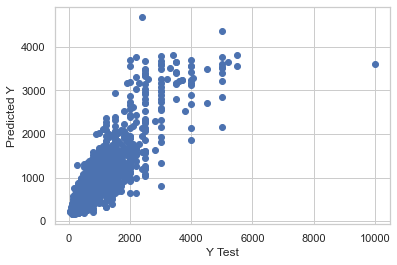

In [291]:
#scatterplot of the real test values versus the predicted values

plt.scatter(y_test,predictions_GB)

plt.xlabel('Y Test')

plt.ylabel('Predicted Y')

#### We can observe that when we plot the predicted values with the actual values we get a graph that looks some what linear in nature

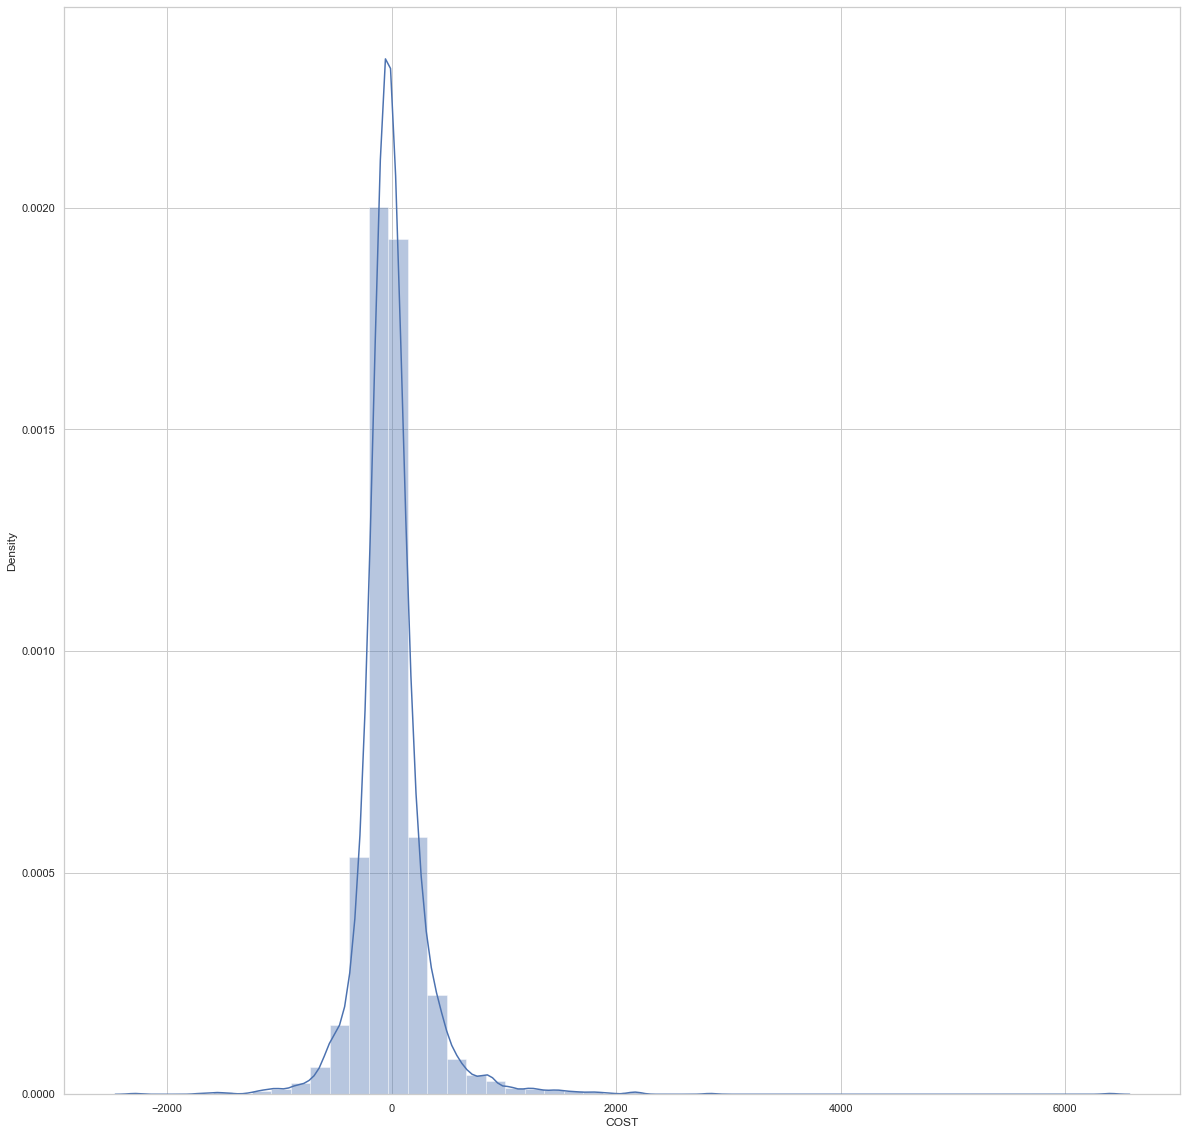

In [292]:
plt.figure(figsize=(20,20))
sns.distplot((y_test-predictions_GB));

### Ploting a histogram of the residuals to make sure it looks normally distributed

In [296]:
# Comparing predicted value vs actual value

print(np.concatenate((predictions_GB.reshape(len(predictions_GB),1), y_test.values.reshape(len(y_test),1)),1))

[[ 739.74299805  850.        ]
 [1040.29807556 1500.        ]
 [ 430.67337436  400.        ]
 ...
 [ 641.8431084   500.        ]
 [ 321.58711264  300.        ]
 [ 297.11623875  300.        ]]


#### We can observe that most of the predictions are close to the actual values

## Test Data Set

In [297]:
test_df_scaled.head()

,RATING,VOTES,LOCALITY_Encoded,TITLE_Encoded,CUISINES_Encoded,CITY_Encoded
0,1.320247,0.943390,1.066716,0.353842,0.201271,0.110035
1,1.076559,-0.721259,-0.347177,-0.614972,-0.743769,1.442864
2,0.101805,0.584771,-0.654278,0.353842,0.201271,1.442864
3,0.101805,1.651327,-1.006581,-0.480609,-0.582988,-1.303030
4,-0.385572,-1.436239,-0.914727,-0.614972,-0.743769,-1.551647


In [298]:
test_df_scaled.shape

(4230, 6)

In [299]:
rest_prices.predict(test_df_scaled)

array([1180.7330783 ,  304.60019383,  651.37109865, ...,  451.05058126,
        285.24129632,  425.16121346])